In [638]:
import matplotlib.pylab as plt
from astropy.io import fits as pyfits
import sys
import numpy as np
import matplotlib as mplt
import scipy.signal
import os
from os import listdir
from os.path import isfile, join
import shutil
from photutils.aperture import CircularAperture, CircularAnnulus, EllipticalAperture, EllipticalAnnulus, aperture_photometry
from scipy.stats import linregress
#import proj4_fxns as fxn

In [2]:
def headerSearch(filelist, SEARCHKEY, SEARCHVAL):
    """
    Scans list of file names to display exposure times and object types from HDU header
        filelist:
        SEARCHKEY:
        SEARCHVAL:
        Returns: None
    """
    #fh = open(filelist, "r")
    allFiles = []
    for filename in filelist:#os.listdir(r'C:\Users\robin\Downloads\Sn_data'):
        hdul = pyfits.open(filename.rstrip())  # rstrip is to remove carriage return
        head = hdul[0].header
        #print(filename, head[SEARCHKEY])
        try:
            #if head[SEARCHKEY] == SEARCHVAL:
            if head[SEARCHKEY].find(SEARCHVAL)>-1:
                print(" file = {}, OBJECT = {}, EXPOSURE = {},".format(filename.rstrip(), head["OBJECT"],
                                                                     head["EXPTIME"]))
                allFiles.append(filename)
                
        except:
            pass
        
    
#         try:
#             if head["OBJECT"] == "DARK" or head["OBJECT"] == "BIAS":
#                 print(" file = {}, OBJECT = {}, EXPOSURE = {}".format(filename.rstrip(), head["OBJECT"],
#                                                                       head["EXPTIME"]))
#         except:
#             pass

        hdul.close()
    return allFiles    

In [3]:
fDir = [f for f in listdir(r"C:\Users\robin\Downloads\SN_data1")]
for i in range(len(fDir)):
    fDir[i] = "SN_data1/" + fDir[i]
    
fDir2 = [f for f in listdir(r"C:\Users\robin\Downloads\SN_data2")]
for i in range(len(fDir2)):
    fDir2[i] = "SN_data2/" + fDir2[i]

In [4]:
day1bias = headerSearch(fDir, SEARCHKEY="OBJECT", SEARCHVAL="bias")
day2bias = headerSearch(fDir2, SEARCHKEY="OBJECT", SEARCHVAL="bias")

day1flat = headerSearch(fDir, SEARCHKEY="OBJECT", SEARCHVAL="SKY_FLAT")
day2flat = headerSearch(fDir2, SEARCHKEY="OBJECT", SEARCHVAL="SKY_FLAT")  # NORMALIZE EACH FLAT. DIVIDE EACH FLAT BY ITS MEDIAN.

 file = SN_data1/dao_c182_2021_003335.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003336.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003337.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003338.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003339.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003340.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003341.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003342.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003343.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003344.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003345.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003346.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003347.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003348.fits, OBJECT 

In [692]:
len(day1flat)

16

In [5]:
allSN = ["2021euj(150@310)", "2021dpw(150@310)", "2021dch(150@310)", "2021dep(150@310)", "2021fbc(150@310)", "2021emc(150@310)",
         "2021end(150@310)", "2021dlb(150@310)", "2021ecv(150@310)"]

In [6]:
# day1files = [f for f in listdir(r"C:\Users\robin\Downloads\SN_data1")]
# for i in range(len(day1files)):
#     SNfiles1[i] = "SN_data1/" + day1files[i]
    
# day2files = [f for f in listdir(r"C:\Users\robin\Downloads\SN_data2")]
# for i in range(len(fDir2)):
#     SNfiles2[i] = "Calibrated2/" + SNfiles2[i]

In [7]:
day1SN = []
for i in range(len(allSN)):
    day1SN.append(headerSearch(fDir, SEARCHKEY="OBJECT", SEARCHVAL=allSN[i]))
    
day1SN = list(np.concatenate(day1SN).flat)

 file = SN_data1/dao_c182_2021_003551.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003552.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003553.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003554.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003555.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003556.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003557.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003558.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003559.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003560.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003561.fits, OBJECT = 2021dpw(150@310), EXPOSURE = 60,
 file = SN_data1/dao_c182_2021_003562.fits, OBJECT = 2

In [8]:
day2SN = []
for i in range(len(allSN)):
    day2SN.append(headerSearch(fDir2, SEARCHKEY="OBJECT", SEARCHVAL=allSN[i]))
    
day2SN = list(np.concatenate(day2SN).flat)

 file = SN_data2/dao_c182_2021_003864.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003865.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003866.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003867.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003868.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003869.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003870.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003871.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003872.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003873.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003874.fits, OBJECT = 2021dpw(150@310), EXPOSURE = 60,
 file = SN_data2/dao_c182_2021_003875.fits, OBJECT = 2

In [9]:
for i in range(len(day1SN)):
    shutil.copy(r"C:/Users/robin/Downloads/"+day1SN[i], r"C:\Users\robin\Downloads\SNFiles1")
    
for i in range(len(day2SN)):
    shutil.copy(r"C:/Users/robin/Downloads/"+day2SN[i], r"C:\Users\robin\Downloads\SNFiles2")

In [10]:
def biases(filepath):
    """
    Given path to folder where fit files are located,
    finds all the bias images and takes their mean/median
    """

    # Find the bias files
    bias_files = headerSearch(filepath, SEARCHKEY="OBJECT", SEARCHVAL="bias")
    
    # Create 3D array to stack the arrays into
    # Array size is hard coded!!

    master = np.zeros((len(bias_files), 2350, 1020))
    
    # Add each picture file to the 3D array along the z-axis
    for num, filename in enumerate(bias_files):
        hdul = pyfits.open(filename)  # rstrip is to remove carriage return
        pdata = hdul[0].data
        
        # add bias array to stack
        master[num] = pdata
        
        hdul.close()
        
    # Take the median over the z-axis of the 3D array and return
    
    return bias_files, np.median(master, axis = 0)

In [11]:
biasFiles1, masterBias1 = biases(fDir)  # master bias of Day 1 observations
pyfits.writeto('MasterBias1.fits', masterBias1, overwrite=True)
biasFiles2, masterBias2 = biases(fDir2) # master bias of Day 2 observations
pyfits.writeto('MasterBias2.fits', masterBias2, overwrite=True)

 file = SN_data1/dao_c182_2021_003335.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003336.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003337.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003338.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003339.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003340.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003341.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003342.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003343.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003344.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003345.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003346.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003347.fits, OBJECT = bias, EXPOSURE = 0,
 file = SN_data1/dao_c182_2021_003348.fits, OBJECT 

In [12]:
def flats(filepath):
    '''
    Generates the master flat if the directory containing the fits files is specified
    '''
    ## Find the bias files
    flat_files = headerSearch(filepath, SEARCHKEY="OBJECT", SEARCHVAL="SKY_FLAT")

    ## Create 3D array to stack the arrays into
    ## Array size is hard coded!!
    master = np.zeros((len(flat_files), 2350, 1020))

    ## Add each picture file to the 3D array along the z-axis
    for num, filename in enumerate(flat_files):
        hdul = pyfits.open(filename)  # rstrip is to remove carriage return
        pdata = hdul[0].data/np.median(hdul[0].data) # longer exposures are brighter, so median accounts for that. 
        
        # add bias array to stack
        master[num] = pdata
        hdul.close()
        
    return flat_files, np.median(master, axis = 0)

In [13]:
flatFiles1, masterFlat1 = flats(fDir)  # master flat of Day 1 observations
pyfits.writeto('MasterFlat1.fits', masterFlat1, overwrite=True)
flatFiles2, masterFlat2 = flats(fDir2) # master flat of Day 2 observations
pyfits.writeto('MasterFlat2.fits', masterFlat2, overwrite=True)

 file = SN_data1/dao_c182_2021_003319.fits, OBJECT = SKY_FLAT, EXPOSURE = 1,
 file = SN_data1/dao_c182_2021_003320.fits, OBJECT = SKY_FLAT, EXPOSURE = 1,
 file = SN_data1/dao_c182_2021_003321.fits, OBJECT = SKY_FLAT, EXPOSURE = 1,
 file = SN_data1/dao_c182_2021_003322.fits, OBJECT = SKY_FLAT, EXPOSURE = 2,
 file = SN_data1/dao_c182_2021_003323.fits, OBJECT = SKY_FLAT, EXPOSURE = 2,
 file = SN_data1/dao_c182_2021_003324.fits, OBJECT = SKY_FLAT, EXPOSURE = 2,
 file = SN_data1/dao_c182_2021_003325.fits, OBJECT = SKY_FLAT, EXPOSURE = 3,
 file = SN_data1/dao_c182_2021_003326.fits, OBJECT = SKY_FLAT, EXPOSURE = 3,
 file = SN_data1/dao_c182_2021_003327.fits, OBJECT = SKY_FLAT, EXPOSURE = 3,
 file = SN_data1/dao_c182_2021_003328.fits, OBJECT = SKY_FLAT, EXPOSURE = 4,
 file = SN_data1/dao_c182_2021_003329.fits, OBJECT = SKY_FLAT, EXPOSURE = 5,
 file = SN_data1/dao_c182_2021_003330.fits, OBJECT = SKY_FLAT, EXPOSURE = 5,
 file = SN_data1/dao_c182_2021_003331.fits, OBJECT = SKY_FLAT, EXPOSURE = 6,

In [14]:
def calibrate(fout, subtract, divide, filelist, filename):

    hduBias = pyfits.open(subtract)
    head = hduBias[0].header
    bias = hduBias[0].data
    hduBias.close()
    
    hdulFlat = pyfits.open(divide)
    head2 = hdulFlat[0].header
    flat = hdulFlat[0].data
    hdulFlat.close()

    iter = filename
    for line in filelist:
        fpath = line.rstrip()
        hdul = pyfits.open(fpath)
        head = hdul[0].header
        imgdata = hdul[0].data
        
        #dark = np.median(imgdata[0:4,0:2306])
        dark = np.median(imgdata[0:2306, 0:4])
        diff = np.median(bias) - dark
        #corrected = (imgdata - bias + diff)/flat
        #corrected[corrected<0] = 0
        corrected = (imgdata-bias)/flat
        hdul[0].data = corrected
        
        if iter < 3864:
            save_path = r"C:\Users\robin\Downloads\test1"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        else:
            save_path = r"C:\Users\robin\Downloads\test2"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        
        head.set('comment', 'Subtracted {} from file {}'.format(subtract, fpath))
        hdul.close()
        iter += 1

In [15]:
SN = [f for f in listdir(r"C:\Users\robin\Downloads\SNFiles1")]
for i in range(len(SN)):
    SN[i] = "SNFiles1/" + SN[i]
    
SN2 = [f for f in listdir(r"C:\Users\robin\Downloads\SNFiles2")]
for i in range(len(SN2)):
    SN2[i] = "SN_data2/" + SN2[i]

In [16]:
SNcalib = calibrate("CalibratedSN1", "MasterBias1.fits", "MasterFlat1.fits", SN, 3551)
SNcalib2 = calibrate("CalibratedSN2", "MasterBias2.fits", "MasterFlat1.fits", SN2, 3864)

In [17]:
def debiasCalib(fout, bias, flat, filelist, filename):
    '''takes(fout,bias,filelist,smooth=10,minval=10) 
       smooth is for +/- that value (boxcar) '''
    smooth=50
    minval=1
    hdulref = pyfits.open(bias)
    head = hdulref[0].header
    refdata = hdulref[0].data
    hdulref.close()

    # specific to Plaskett. First four columns provide additional bias info
    refbiassec = refdata[:,0:4]*1
    NY,NX=refdata.shape
    
    hdulFlat = pyfits.open(flat)
    head2 = hdulFlat[0].header
    masterflat = hdulFlat[0].data
    hdulFlat.close()
    
    refbiassec1d = np.zeros(NY)
    for i in range(NY):
        refbiassec1d[i] = np.sum(refbiassec[i,0:4])/4
    tmp=refbiassec1d*1
    for i in range(smooth,NY-smooth):
        refbiassec1d[i] = np.sum(tmp[i-smooth:i+smooth])/(2*smooth)
    for i in range(0,smooth):refbiassec1d[i]=refbiassec1d[smooth]*1
    for i in range(NY-smooth,NY):refbiassec1d[i]=refbiassec1d[NY-smooth-1]*1
        
    refbias1d = np.zeros((2350,1020))
    for i in range(1020):
        refbias1d[:,i] = refbiassec1d  # same shape as imgdata but repeated columns.

    iter = filename
    for line in filelist:
        fpath = line.rstrip()
        hdul = pyfits.open(fpath)

        head = hdul[0].header
        imgdata = hdul[0].data

        biassec = imgdata[:,0:4]*1
        NY,NX=refdata.shape
        biassec1d = np.zeros(NY)
        for i in range(NY):
            biassec1d[i] = np.sum(biassec[i,0:4])/4
        tmp=biassec1d*1
        for i in range(smooth,NY-smooth):
            biassec1d[i] = np.sum(tmp[i-smooth:i+smooth])/(2*smooth)
        for i in range(0,smooth):biassec1d[i]=biassec1d[smooth]*1
        for i in range(NY-smooth,NY):biassec1d[i]=biassec1d[NY-smooth-1]*1
            
        bias1d = np.zeros((2350,1020))
        for i in range(1020):
            bias1d[:,i] = biassec1d

        Ndata = imgdata.size
        Nref = refdata.size

        if not Ndata == Nref:
            print("Mismatch between data {} and reference {}".format(Ndata, Nref))
            sys.exit()

        NY, NX = imgdata.shape     
        corrected = imgdata * 0
        #corrected = (imgdata - refdata-(bias1d-refbias1d))/masterflat
        #corrected[corrected<minval] = minval
        for j in range(NY):
            for i in range(NX):
                corrected[j][i] = max(imgdata[j][i] - refdata[j][i]-(biassec1d[j]-refbiassec1d[j]),minval)
        
        hdul[0].data = corrected

        if iter < 3864:
            save_path = r"C:\Users\robin\Downloads\finalTest1"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        else:
            save_path = r"C:\Users\robin\Downloads\finalTest2"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        head.set('comment', 'Debiased {} from file {}'.format(bias, fpath))
        hdul.close()
        iter += 1

In [18]:
calib = debiasCalib("CalibratedSN1", "MasterBias1.fits", "MasterFlat1.fits", SN, 3551)
calib2 = debiasCalib("CalibratedSN2", "MasterBias2.fits", "MasterFlat1.fits", SN2, 3864)

In [19]:
Dir = [f for f in listdir(r"C:\Users\robin\Downloads\finalTest1")]
for i in range(len(Dir)):
    Dir[i] = "finalTest1/" + Dir[i]
    
Dir2 = [f for f in listdir(r"C:\Users\robin\Downloads\finalTest2")]
for i in range(len(Dir2)):
    Dir2[i] = "finalTest2/" + Dir2[i]

# Dir = [f for f in listdir(r"C:\Users\robin\Downloads\finalCalibrated1")]
# for i in range(len(Dir)):
#     Dir[i] = "finalCalibrated1/" + Dir[i]
    
# Dir2 = [f for f in listdir(r"C:\Users\robin\Downloads\finalCalibrated2")]
# for i in range(len(Dir2)):
#     Dir2[i] = "finalCalibrated2/" + Dir2[i]

In [20]:
euj1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021euj(150@310)")
dpw1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dpw(150@310)")
dch1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dch(150@310)")
dep1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dep(150@310)")
fbc1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021fbc(150@310)")
emc1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021emc(150@310)")
end1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021end(150@310)")
dlb1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dlb(150@310)")
ecv1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021ecv(150@310)")

# euj2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021euj(150@310)")
# dpw2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dpw(150@310)")
# dch2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dch(150@310)")
# dep2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dep(150@310)")
# fbc2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021fbc(150@310)")
# emc2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021emc(150@310)")
# end2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021end(150@310)")
# dlb2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dlb(150@310)")
# ecv2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021ecv(150@310)")

 file = finalTest1/CalibratedSN1-003551.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003552.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003553.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003554.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003555.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003556.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003557.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003558.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003559.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003560.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1-003561.fits, OBJECT = 2021dpw(150@310), EXPOSURE = 60,
 file = finalTest1/CalibratedSN1

In [21]:
def alignByShift(fout, REFFITS, filelist,filename):
    '''Register images by shifting in X and Y. Uses cross-correlation to find displacement
       takes (fout,REFFITS,filelist="shift.list") '''

    hdulref = pyfits.open(REFFITS)
    refhead = hdulref[0].header
    refdata = hdulref[0].data
    hdulref.close()

    iter = filename
    for line in filelist:
        fpath = line.rstrip()
        hdul = pyfits.open(fpath)

        head = hdul[0].header
        imgdata = hdul[0].data

        Ndata = len(imgdata)

        Nref = len(refdata)

        if not Ndata == Nref:
            print("Mismatch between data {} and reference {}".format(Ndata, Nref))
            sys.exit()

        print("Starting cross correlation for {}".format(fpath))

        I_imgdata = np.fft.fft(np.ravel(imgdata))
        I_refdata = np.fft.fft(np.ravel(refdata))

        V = I_imgdata.conjugate() * I_refdata

        crosscor = np.fft.ifft(V).real
        ind1d = np.argmax(crosscor)

        shifted = np.reshape(np.roll(np.ravel(imgdata), ind1d), imgdata.shape)

        head.set('comment', 'alignedByShift')
        head.set('comment', 'original file: ' + fpath)
        hdul[0].data = shifted
        if iter < 3864:
            save_path = r"C:\Users\robin\Downloads\finalShifted"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        else:
            save_path = r"C:\Users\robin\Downloads\finalShifted2"
            outputFile = fout + "-" + repr(iter).zfill(6) + ".fits"
            completeName = os.path.join(save_path, outputFile)
            hdul.writeto(completeName,overwrite=True)
        iter += 1
        hdul.close()

In [22]:
eujD1 = alignByShift("final",euj1[0],euj1,3551)
dpwD1 = alignByShift("final",dpw1[0],dpw1,3561)
dchD1 = alignByShift("final",dch1[0],dch1,3571)
depD1 = alignByShift("final",dep1[0],dep1,3581)
fbcD1 = alignByShift("final",fbc1[0],fbc1,3591)
emcD1 = alignByShift("final",emc1[0],emc1,3601)
endD1 = alignByShift("final",end1[0],end1,3611)
dlbD1 = alignByShift("final",dlb1[0],dlb1,3621)
ecvD1 = alignByShift("final",ecv1[0],ecv1,3631)

Starting cross correlation for finalTest1/CalibratedSN1-003551.fits
Starting cross correlation for finalTest1/CalibratedSN1-003552.fits
Starting cross correlation for finalTest1/CalibratedSN1-003553.fits
Starting cross correlation for finalTest1/CalibratedSN1-003554.fits
Starting cross correlation for finalTest1/CalibratedSN1-003555.fits
Starting cross correlation for finalTest1/CalibratedSN1-003556.fits
Starting cross correlation for finalTest1/CalibratedSN1-003557.fits
Starting cross correlation for finalTest1/CalibratedSN1-003558.fits
Starting cross correlation for finalTest1/CalibratedSN1-003559.fits
Starting cross correlation for finalTest1/CalibratedSN1-003560.fits
Starting cross correlation for finalTest1/CalibratedSN1-003561.fits
Starting cross correlation for finalTest1/CalibratedSN1-003562.fits
Starting cross correlation for finalTest1/CalibratedSN1-003563.fits
Starting cross correlation for finalTest1/CalibratedSN1-003564.fits
Starting cross correlation for finalTest1/Calibr

In [23]:
# eujD2 = alignByShift("final2",euj2[0],euj2,3864)
# dpwD2 = alignByShift("final2",dpw2[0],dpw2,3874)
# dchD2 = alignByShift("final2",dch2[0],dch2,3884)
# depD2 = alignByShift("final2",dep2[0],dep2,3894)
# fbcD2 = alignByShift("final2",fbc2[0],fbc2,3904)
# emcD2 = alignByShift("final2",emc2[0],emc2,3914)
# endD2 = alignByShift("final2",end2[0],end2,3924)
# dlbD2 = alignByShift("final2",dlb2[0],dlb2,3934)
# ecvD2 = alignByShift("final2",ecv2[0],ecv2,3944)

# Coordinates

2021euj(150@310): 436,1199 (radius 10 pixels)

2021dpw(150@310): 686, 584 (radius 16 pixels)

2021dch(150@310): ? 484, 783 (radius 7)

2021dep(150@310): ? 643, 1026 (radius 9)

2021fbc(150@310): possibly 288, 342 (radius 10)

2021emc(150@310): ? 888, 1746 (radius 10)

2021end(150@310): possibly 211,640 (radius 10)

2021dlb(150@310): maybe 607, 1390 (radius 9)

2021ecv(150@310): 396, 1245 (radius 9)

# Coordinates

2021euj(150@310): 436,1194 (radius 8 pixels)

2021dpw(150@310): 685, 593 (radius 10 pixels)

2021dch(150@310): maybe 484, 782 (radius 7)

2021dep(150@310): 645,1025 (radius 7)

2021fbc(150@310): possibly 286,344 (radius 8)

2021emc(150@310): maybe 886, 1743 (radius 10)

2021end(150@310): possibly 209, 656 (radius 10)

2021dlb(150@310): 604, 1382 (radius 6)

2021ecv(150@310): 394, 1255 (radius 8)

In [24]:
Dir = [f for f in listdir(r"C:\Users\robin\Downloads\finalShifted")]
for i in range(len(Dir)):
    Dir[i] = "finalShifted/" + Dir[i]
    
Dir2 = [f for f in listdir(r"C:\Users\robin\Downloads\finalShifted2")]
for i in range(len(Dir2)):
    Dir2[i] = "finalShifted2/" + Dir2[i]

In [25]:
euj1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021euj(150@310)")
dpw1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dpw(150@310)")
dch1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dch(150@310)")
dep1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dep(150@310)")
fbc1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021fbc(150@310)")
emc1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021emc(150@310)")
end1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021end(150@310)")
dlb1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021dlb(150@310)")
ecv1 = headerSearch(Dir, SEARCHKEY="OBJECT", SEARCHVAL="2021ecv(150@310)")

euj2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021euj(150@310)")
dpw2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dpw(150@310)")
dch2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dch(150@310)")
dep2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dep(150@310)")
fbc2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021fbc(150@310)")
emc2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021emc(150@310)")
end2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021end(150@310)")
dlb2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021dlb(150@310)")
ecv2 = headerSearch(Dir2, SEARCHKEY="OBJECT", SEARCHVAL="2021ecv(150@310)")

 file = finalShifted/final-003551.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003552.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003553.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003554.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003555.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003556.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003557.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003558.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003559.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003560.fits, OBJECT = 2021euj(150@310), EXPOSURE = 60,
 file = finalShifted/final-003561.fits, OBJECT = 2021dpw(150@310), EXPOSURE = 60,
 file = finalShifted/final-003562.fits, OBJECT = 2021dpw(150@310), EXPOSURE = 60,
 file = finalShi

 file = finalShifted2/final2-003894.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003895.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003896.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003897.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003898.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003899.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003900.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003901.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003902.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003903.fits, OBJECT = 2021dep(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003904.fits, OBJECT = 2021fbc(150@310), EXPOSURE = 60,
 file = finalShifted2/final2-003905.fits, OBJECT = 2021fbc(150@310), EXPOSUR

In [26]:
# list1 = [euj1,dpw1,dch1,dep1,fbc1,emc1,end1,dlb1,ecv1]
# list2 = [euj2,dpw2,dch1,dep2,fbc2,emc2,end2,dlb2,ecv2] # 1.1, 2.1, 3.1, 4.1, 5.1, 6.2, 7.1, 8.2
# posD1 = [(435,1206),(685,584),(483,782),(642,1025),(287,341),(887,1746),(210,640),(605,1389),(395,1245)]
# #posD1 = [(435,1206),(785,512),(642,1025),(287,341),(887,1746),(210,640),(605,1389),(395,1245)]
# posD2 = [(434,1193),(685,593),(483,782),(641,1023),(285,344),(886,1743),(208,655),(603,1382),(392,1253)]

# radii = [10,16,5,6,5,9,7,8]
# rin = [13,19,7,9,8,12,12,11]
# rout = [16,22,8,10,15,16,15,14]

# radii2 = [6,11,4,4,9,10,6,7]
# rin2 = [7,14,6,7,12,12,12,10]
# rout2 = [8,17,7,15,15,16,15,13]

In [582]:
def plots(filelist, j, allapers, allann):
    for i in range(len(filelist[0])):
        hdu = pyfits.open(filelist[j][i])
        data = hdu[0].data
        plt.figure(figsize=(12,8))
        plt.imshow(data,origin='lower',interpolation='nearest',vmin=1, vmax=100)
        plt.colorbar()

        ap_patches = allapers[j].plot(color='white', lw=2,label='Photometry aperture')
        ann_patches = allann[j].plot(color='red', lw=2,label='Background annulus')
        handles = (ap_patches[0], ann_patches[0])

        if filelist[j] == euj1:
            plt.title("SN 2021euj",fontsize=15)
            plt.xlabel("X pixels")
            plt.ylabel("Y pixels")
            plt.xlim(425,525)
            plt.ylim(1030,1138)
            plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})
            plt.savefig("2021euj.{}.png".format(i))
        if filelist[j] == dch1:
            plt.title("SN 2021dch",fontsize=15)
            plt.xlabel("X pixels")
            plt.ylabel("Y pixels")
            plt.xlim(250,350)
            plt.ylim(50,150)
            plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})
            if i == 4:
                plt.savefig("2021dch.png")
        if filelist[j] == dep1:
            plt.title("SN 2021dep",fontsize=15)
            plt.xlabel("X pixels")
            plt.ylabel("Y pixels")
            plt.xlim(450,550)
            plt.ylim(1020,1120)
            plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})
            if i == 4:
                plt.savefig("2021dep.png")

In [583]:
def starplots(filelist, j, allapers, allann):
    for i in range(len(filelist[0])):
        hdu = pyfits.open(filelist[j][i])
        data = hdu[0].data
        plt.figure(figsize=(12,8))
        plt.imshow(data,origin='lower',interpolation='nearest',vmin=1, vmax=100)
        plt.colorbar()

        ap_patches = allapers[j].plot(color='white', lw=2,label='Photometry aperture')
        ann_patches = allann[j].plot(color='red', lw=2,label='Background annulus')
        handles = (ap_patches[0], ann_patches[0])

        if filelist[j] == euj1:
            plt.title("GPM 169.502728+18.880488",fontsize=15)
            plt.xlabel("X pixels")
            plt.ylabel("Y pixels")
            plt.xlim(385,485)
            plt.ylim(1155,1251)
            plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})
            if i == 5:
                plt.savefig("2021eujStar.png")
        elif filelist[j] == dep1:
            plt.title("TYC 2012-312-1",fontsize=15)
            plt.xlabel("X pixels")
            plt.ylabel("Y pixels")
            plt.xlim(525,632)
            plt.ylim(820,920)
            plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})
            if i == 9:
                plt.savefig("2021depStar.png")

        plt.legend(loc='best',facecolor='springgreen',handles=handles, prop={'weight': 'bold', 'size': 11})

In [820]:
def photometry(filelist, allapers, allann):  
    countSum = []
    finalErr = []
    for j in range(len(filelist)):
        counts = []
        err = []
        bkgerr = []
        if len(filelist) == 3:
            call = plots(filelist, j, allapers, allann)
        elif len(filelist) == 2:
            call2 = starplots(filelist,j,allapers,allann)
        for i in range(len(filelist[j])):
            apers = [allapers[j], allann[j]]
            hdu = pyfits.open(filelist[j][i])
            data = hdu[0].data
            error = np.sqrt(data)
            phot_table = aperture_photometry(data, apers,error=error)

            for col in phot_table.colnames:
                phot_table[col].info.format = '%.8g'  # for consistent table output
            #print(phot_table) #The aperture_sum_0 column refers to the first aperture in the list of input apertures 
            #(i.e., the circular aperture) and the aperture_sum_1 column refers to the second aperture (i.e., the circular annulus).

            bkg_mean = phot_table['aperture_sum_1'] / allann[j].area
            bkg_sum = bkg_mean * allapers[j].area  # for the source, this is the total number of background counts in circle.
            final_sum = phot_table['aperture_sum_0'] - bkg_sum
            phot_table['residual_aperture_sum'] = final_sum  # after deleting background
            phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
            #print(phot_table['residual_aperture_sum']) # number of photons at the filter wavelength. Energy -> Flux.
            err.append((phot_table['aperture_sum_err_1']))
            if final_sum > 0:
                counts.append(final_sum)
        countSum.append(np.mean(counts)), finalErr.append(np.mean(err))
        print("\n")
    return countSum, finalErr

In [585]:
list1 = [euj1,dch1,dep1]
posD1 = [(463,1097),(302,98),(500,1068)]
radii = [5,12,13]
rin = [6,13,14]
rout = [9,18,19]

starlist = [euj1,dep1]
refstar = [(435,1206),(575,870)] # euj and dep. dch compare to galaxy itself.
refstarR = [13,19]
refrin = [15, 23]
refrout = [21, 31]

In [586]:
d1apers = []
d1ann = []
for i in range(len(radii)):
    aps = CircularAperture(posD1[i], radii[i])
    ann = CircularAnnulus(posD1[i], r_in=rin[i], r_out=rout[i])
    d1apers.append(aps), d1ann.append(ann)
    
starApers = []
starAnns = []
for i in range(len(refstarR)):
    ap = CircularAperture(refstar[i], refstarR[i])
    an = CircularAnnulus(refstar[i], r_in=refrin[i], r_out=refrout[i])
    starApers.append(ap), starAnns.append(an)

aperture_sum_0
--------------
     2843.9082
aperture_sum_1
--------------
     1724.0002
aperture_sum_0
--------------
      2014.774
aperture_sum_1
--------------
     1639.5442
aperture_sum_0
--------------
     2735.2927
aperture_sum_1
--------------
     1534.9814
aperture_sum_0
--------------
     817.48272
aperture_sum_1
--------------
     1299.2942
aperture_sum_0
--------------
     2209.7286
aperture_sum_1
--------------
     1156.1033
aperture_sum_0
--------------
     2660.8312
aperture_sum_1
--------------
     1637.4954
aperture_sum_0
--------------
     2334.6909
aperture_sum_1
--------------
     1521.1661
aperture_sum_0
--------------
     3524.0222
aperture_sum_1
--------------
     2845.4406
aperture_sum_0
--------------
     2283.2571
aperture_sum_1
--------------
     1425.0657
aperture_sum_0
--------------
      2504.784
aperture_sum_1
--------------
     1892.9559


aperture_sum_0
--------------
     475711.62
aperture_sum_1
--------------
     125356.61
aperture

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


aperture_sum_0
--------------
     30943.281
aperture_sum_1
--------------
     9605.2691
aperture_sum_0
--------------
     31785.797
aperture_sum_1
--------------
      9752.988
aperture_sum_0
--------------
     32833.314
aperture_sum_1
--------------
     9594.8638
aperture_sum_0
--------------
     31378.123
aperture_sum_1
--------------
     8804.7314
aperture_sum_0
--------------
     28764.771
aperture_sum_1
--------------
     7795.8496
aperture_sum_0
--------------
     51441.714
aperture_sum_1
--------------
     15985.639
aperture_sum_0
--------------
     52112.681
aperture_sum_1
--------------
     17000.943
aperture_sum_0
--------------
     54999.301
aperture_sum_1
--------------
     17403.582
aperture_sum_0
--------------
     52224.951
aperture_sum_1
--------------
     15270.895
aperture_sum_0
--------------
     50294.151
aperture_sum_1
--------------
      14131.51




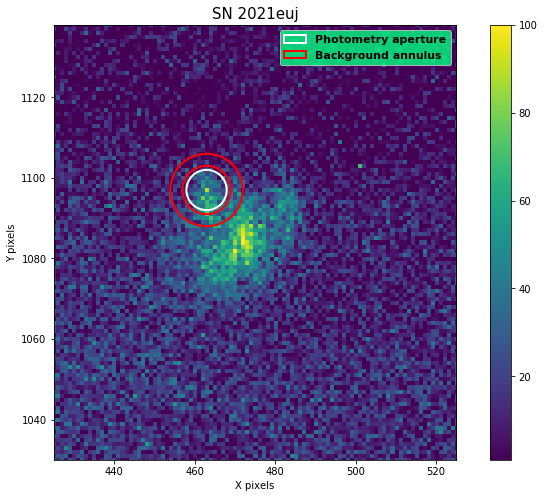

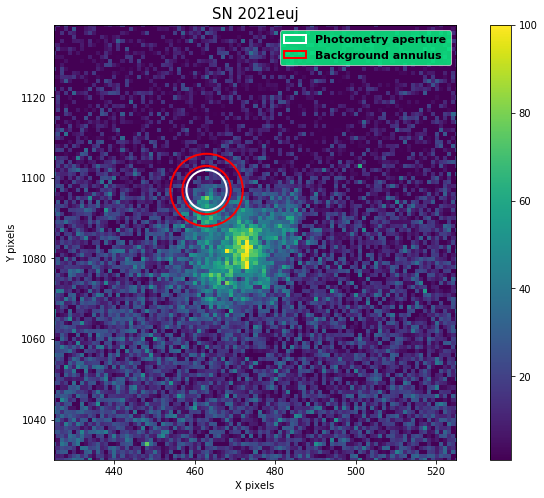

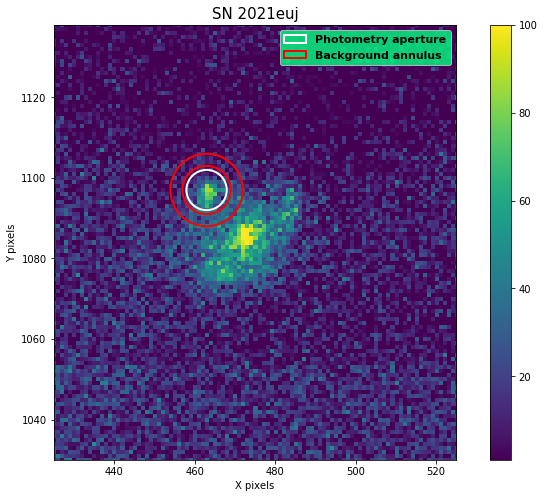

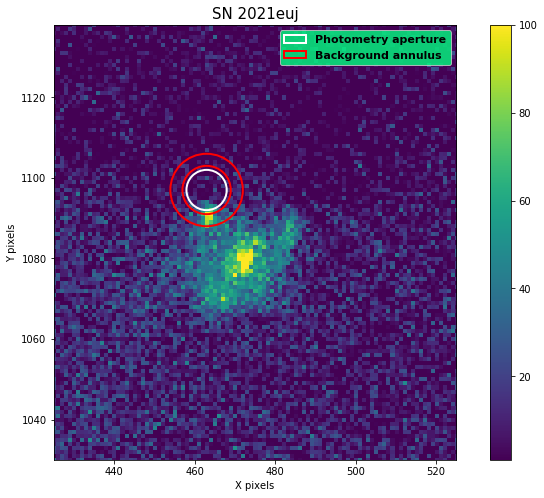

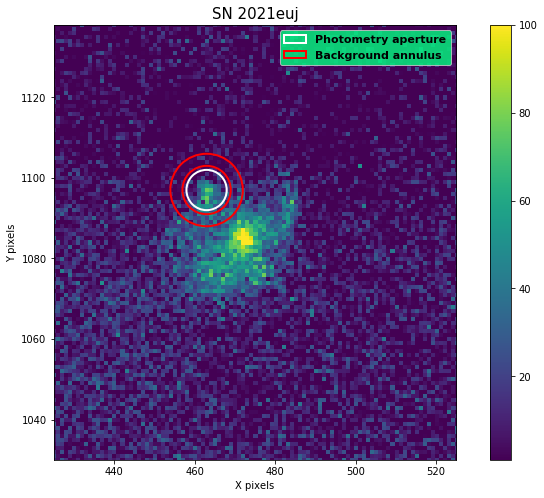

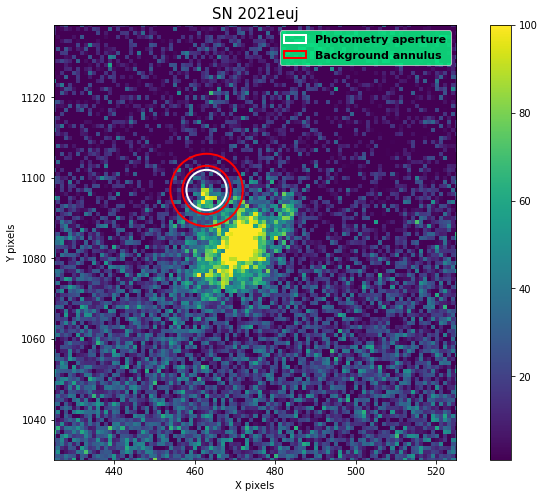

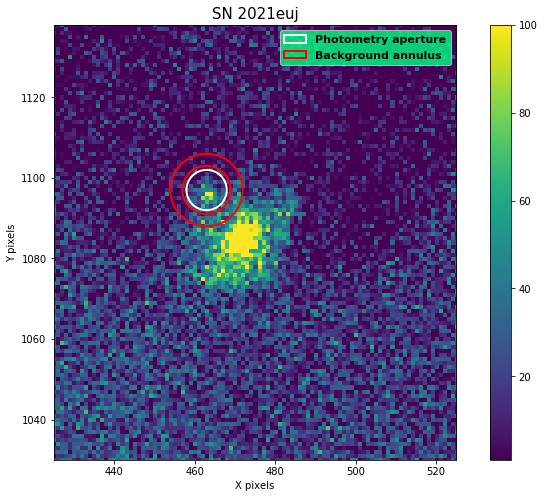

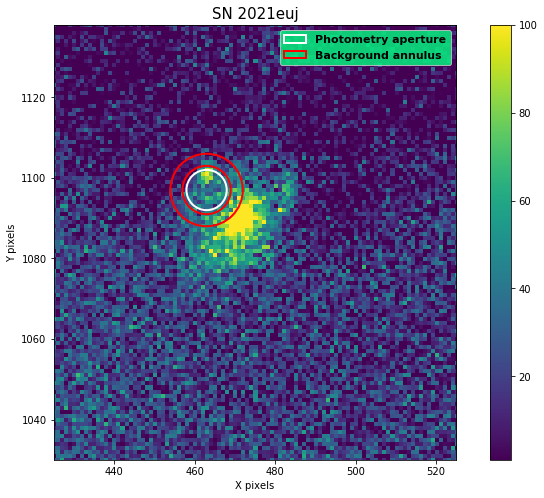

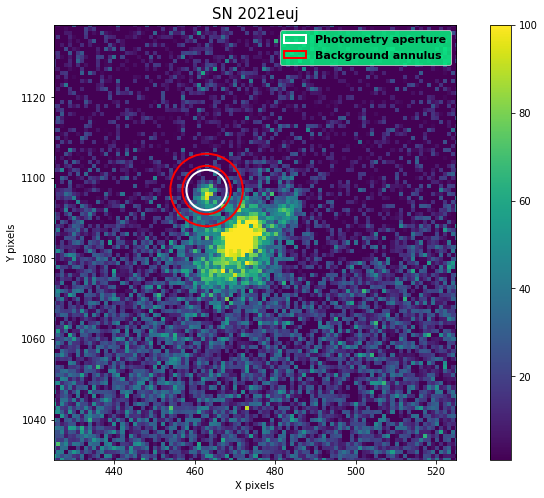

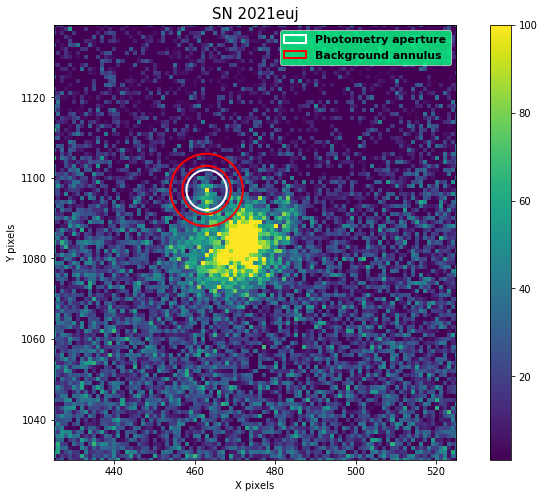

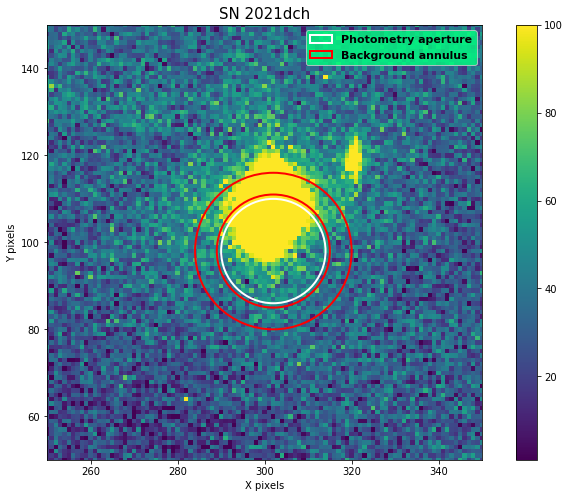

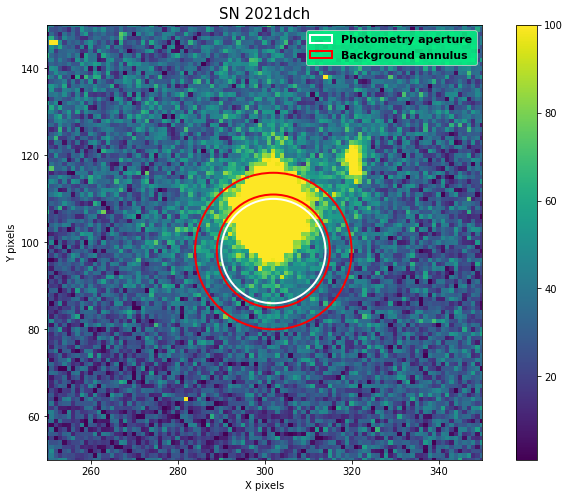

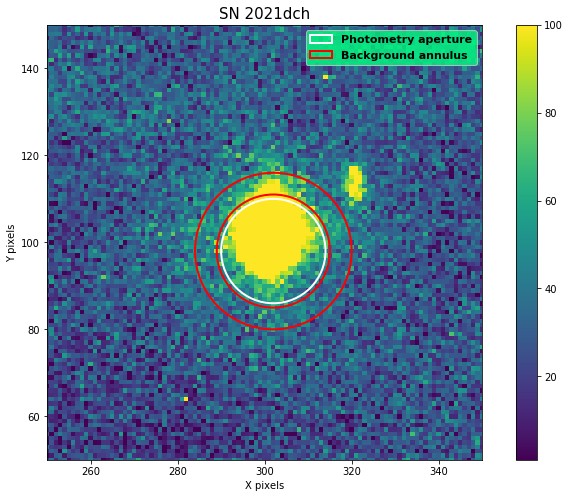

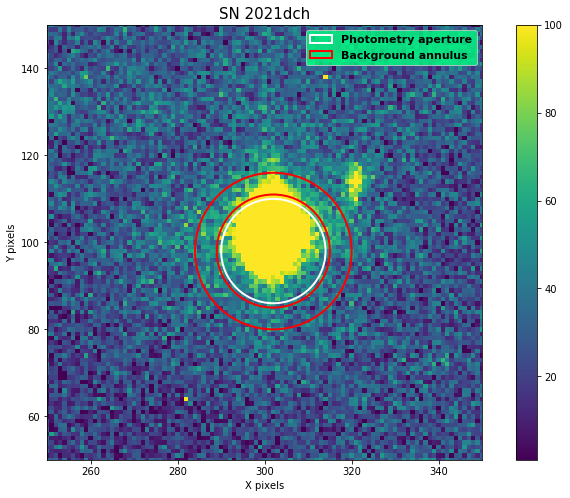

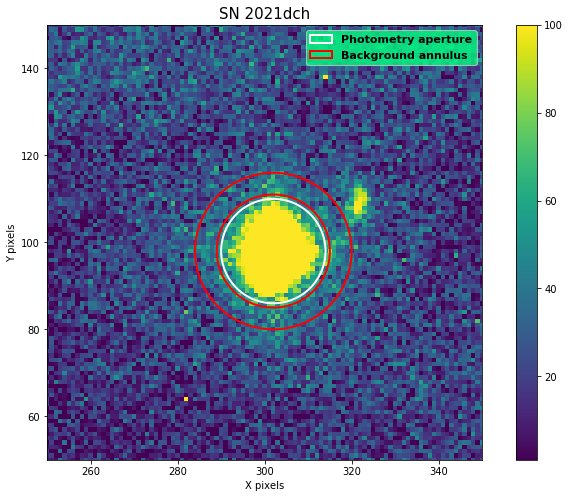

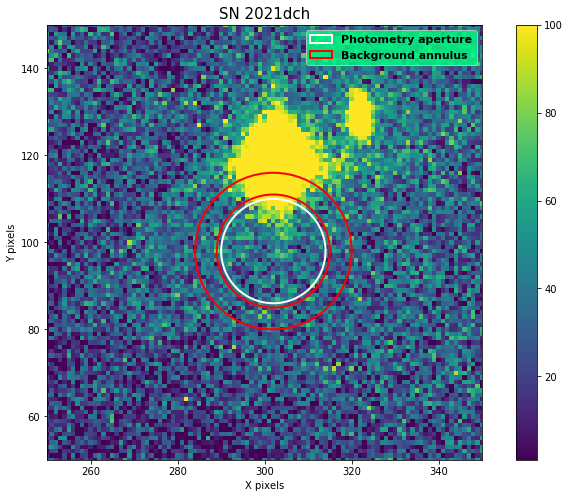

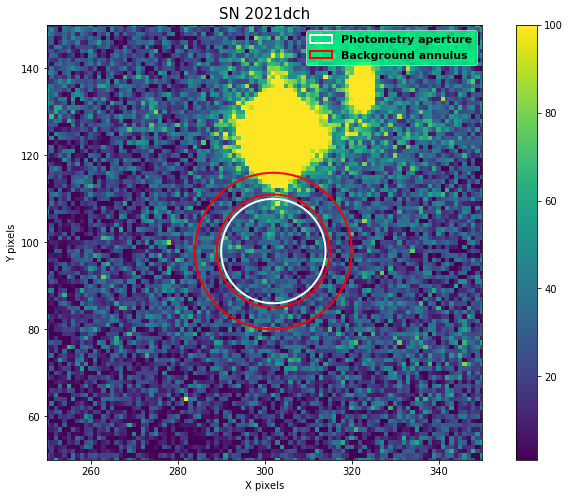

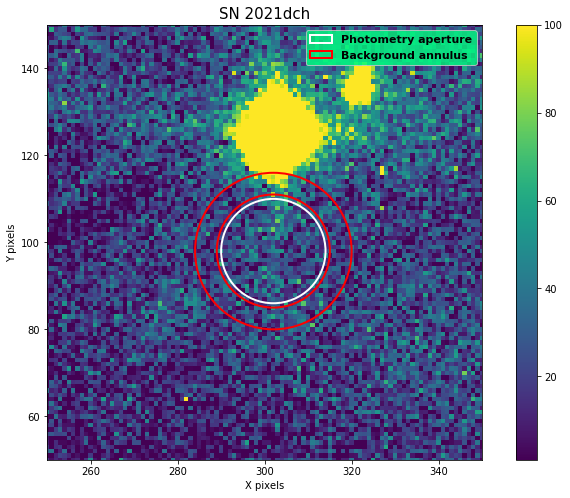

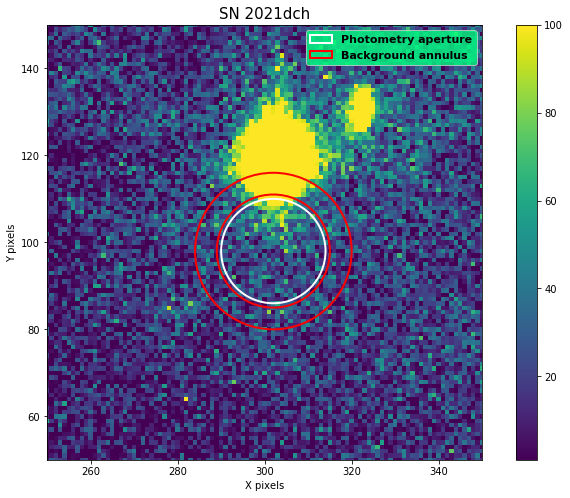

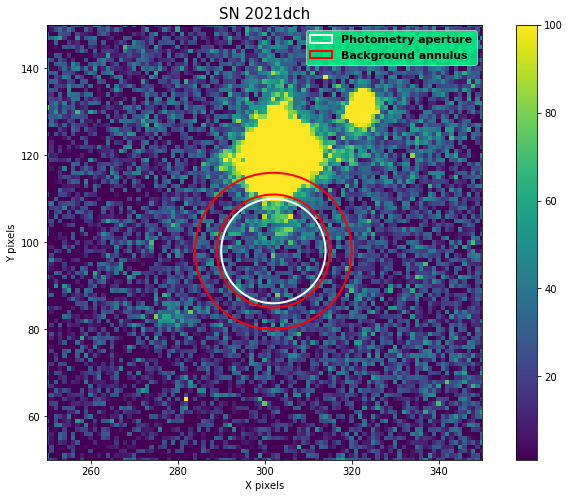

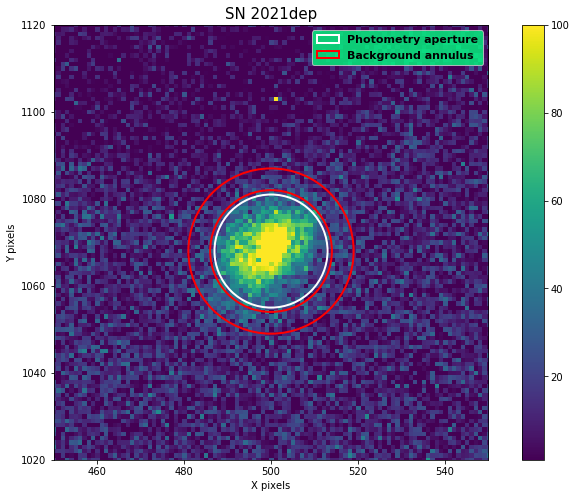

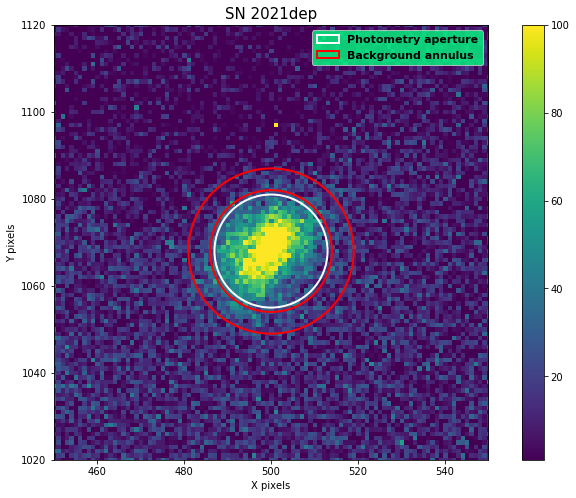

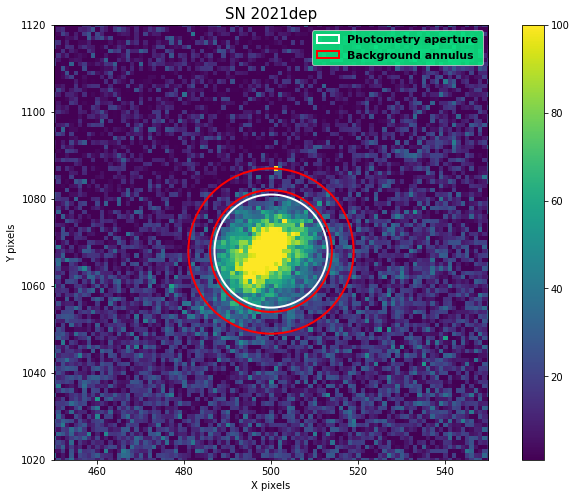

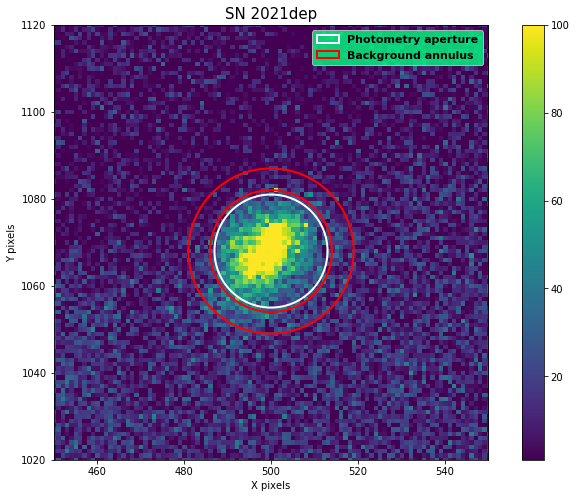

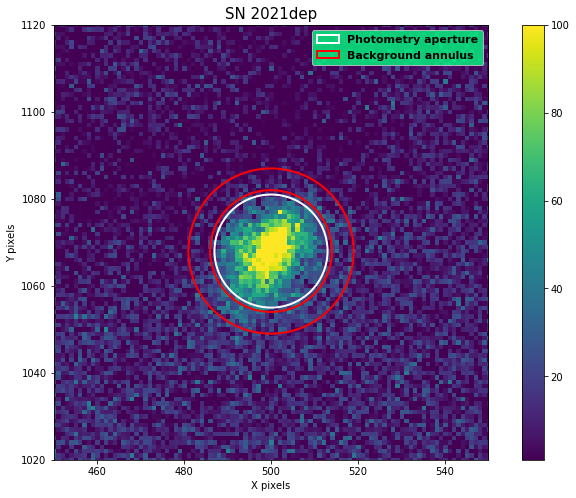

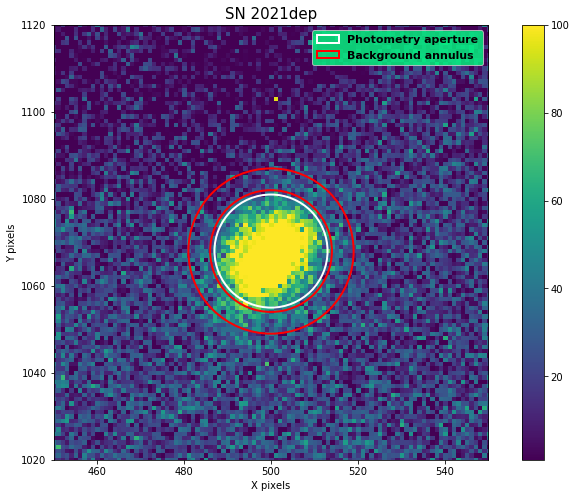

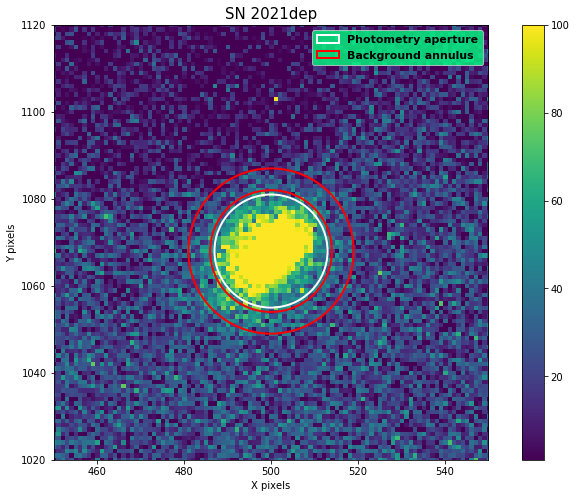

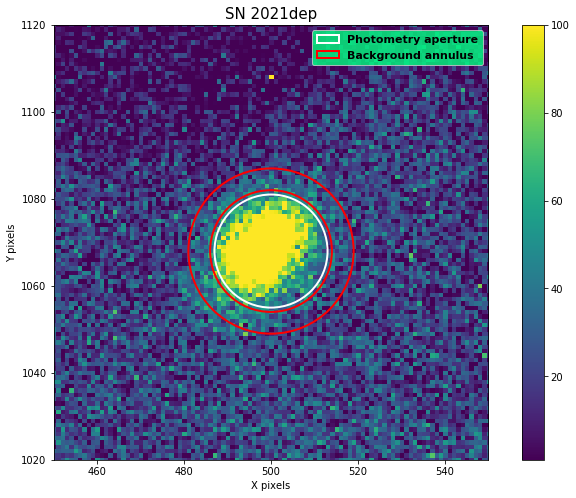

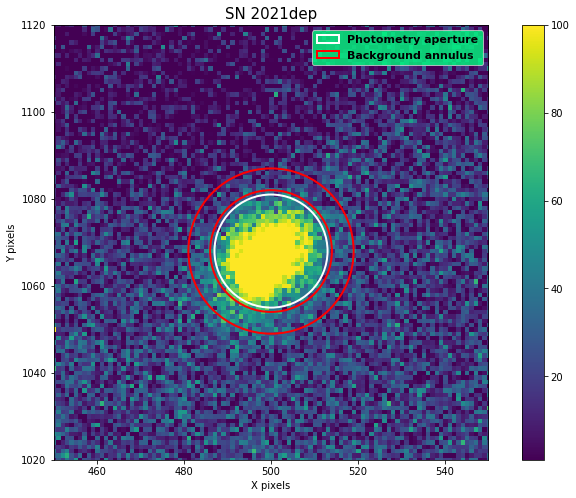

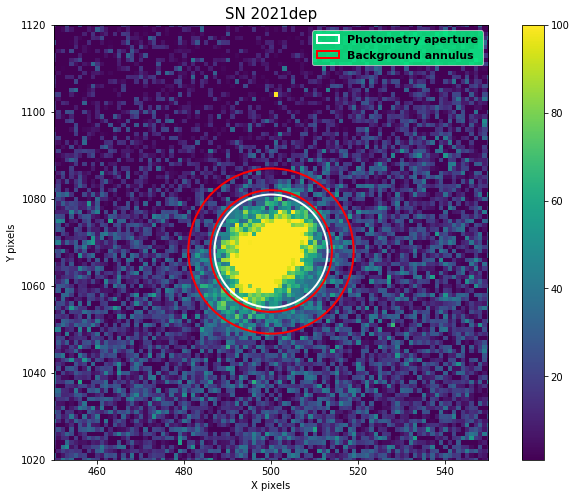

In [819]:
SNcounts = photometry(list1, d1apers, d1ann)

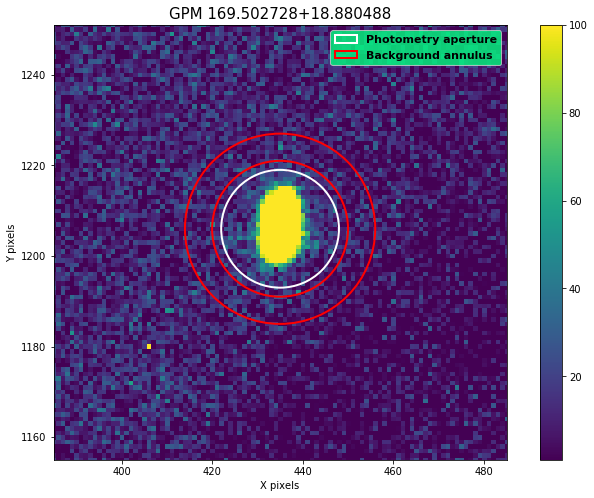

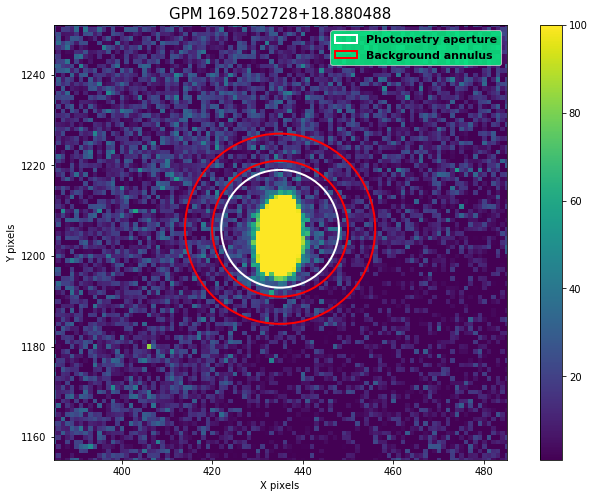

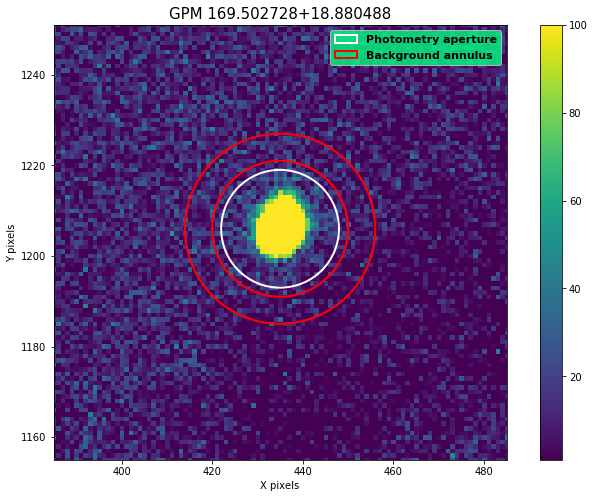

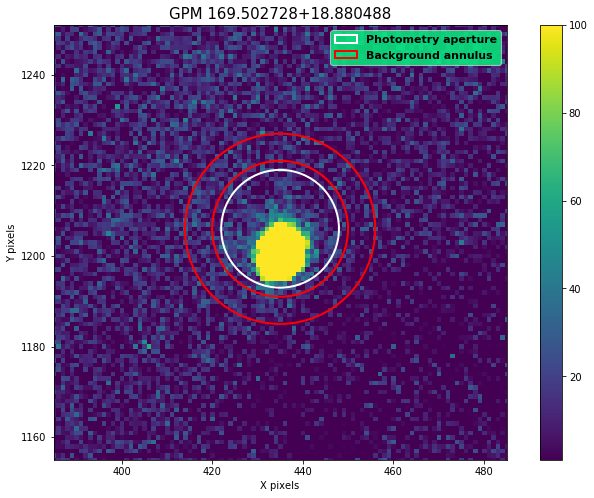

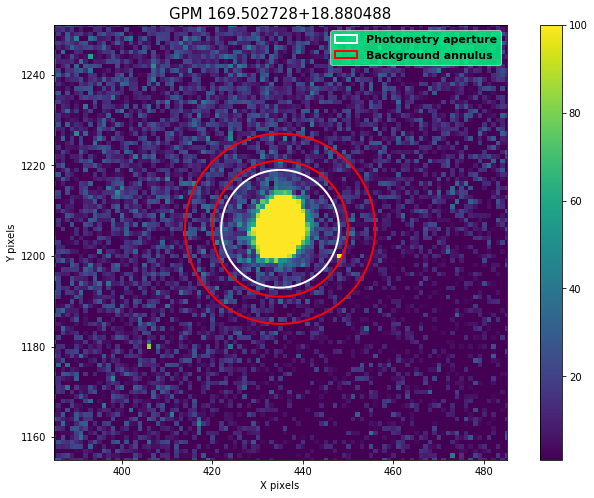

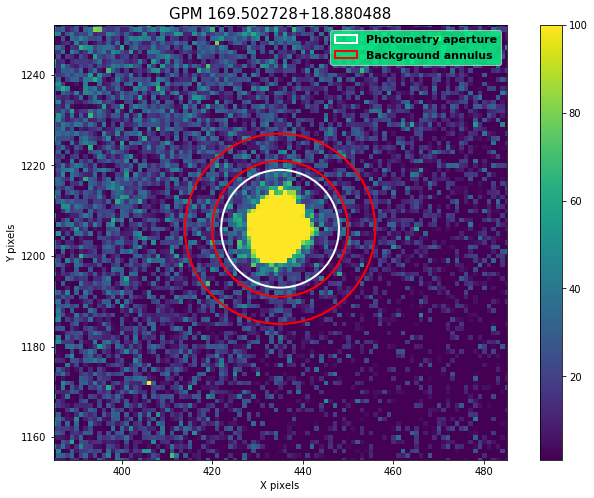

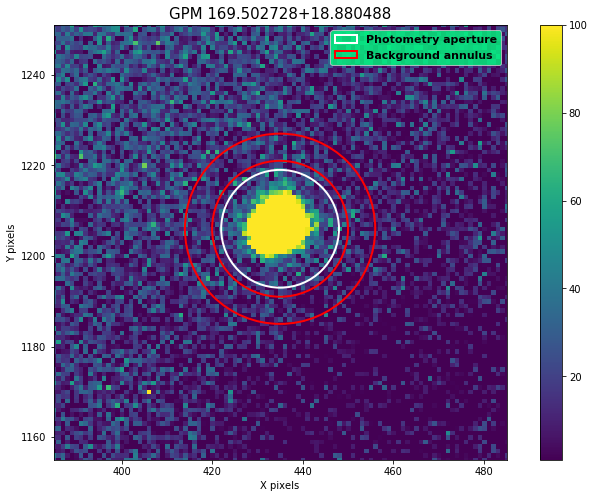

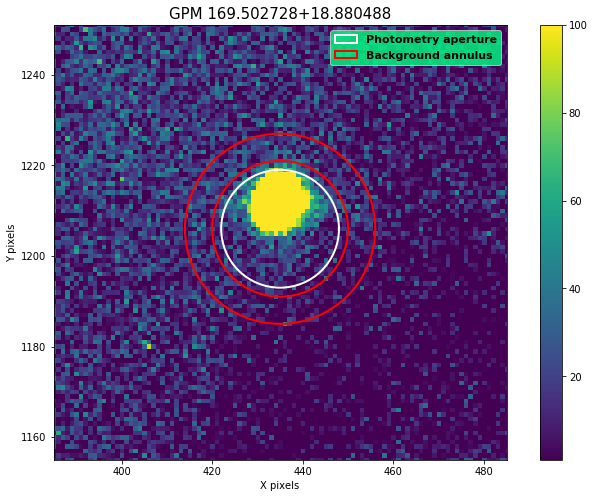

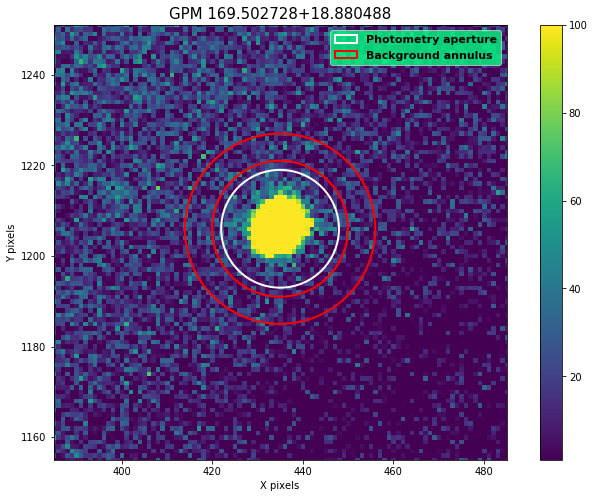

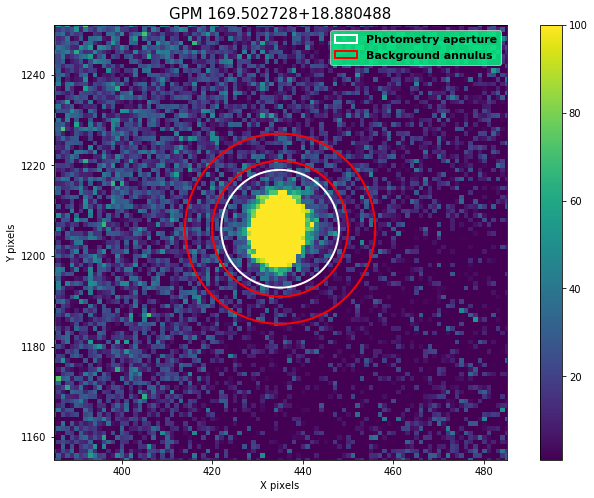

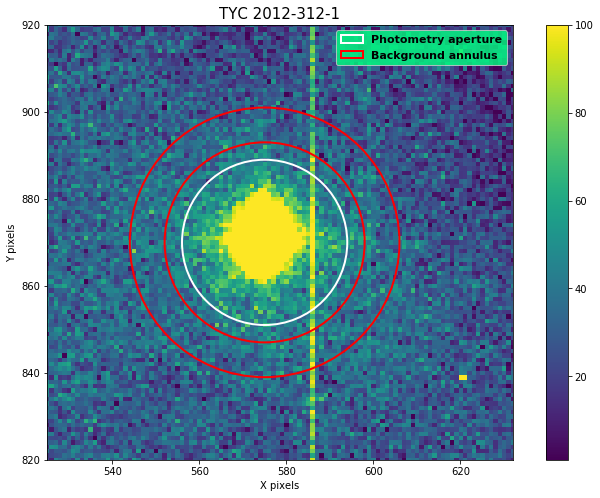

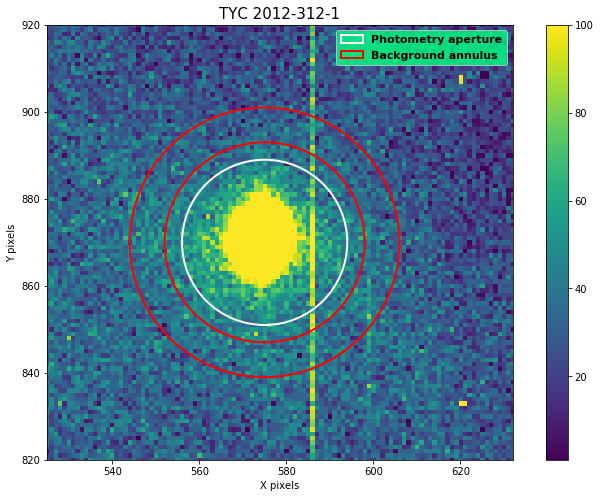

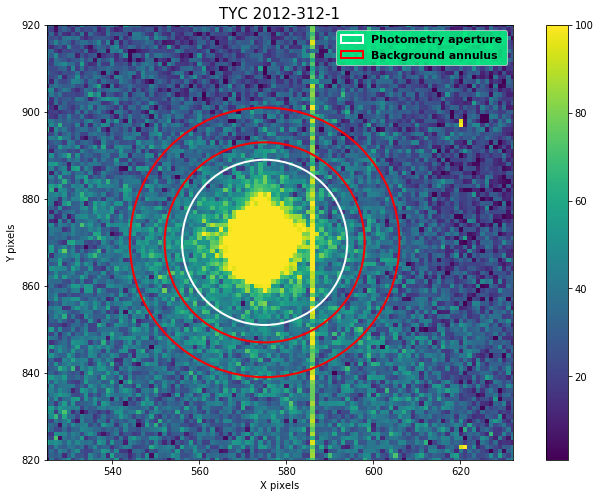

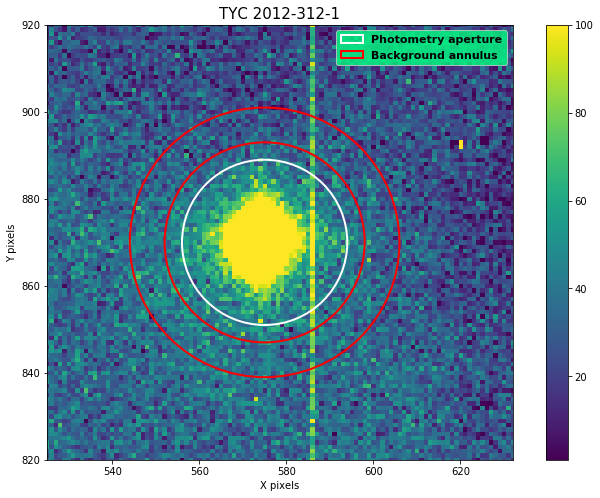

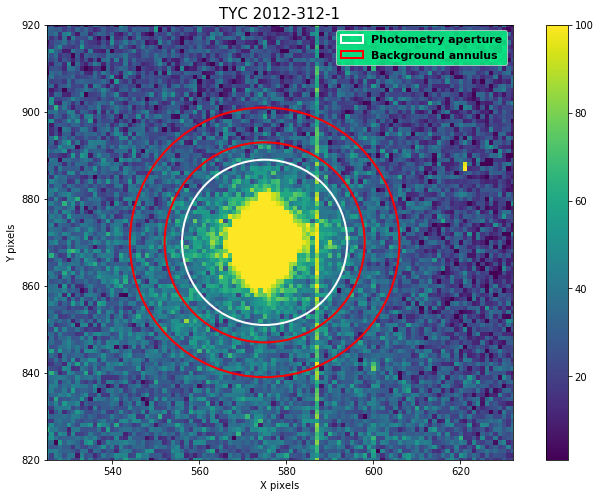

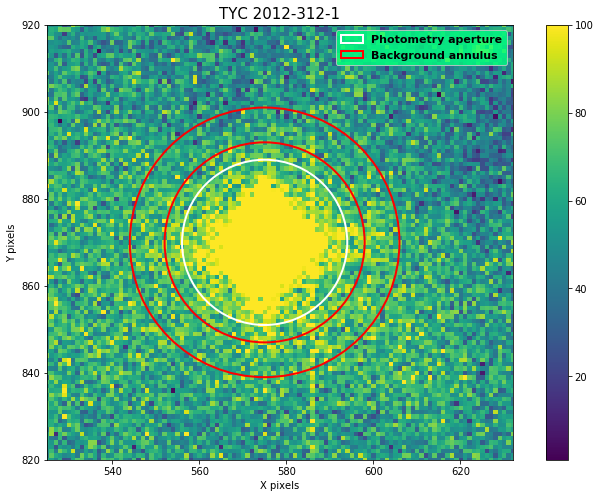

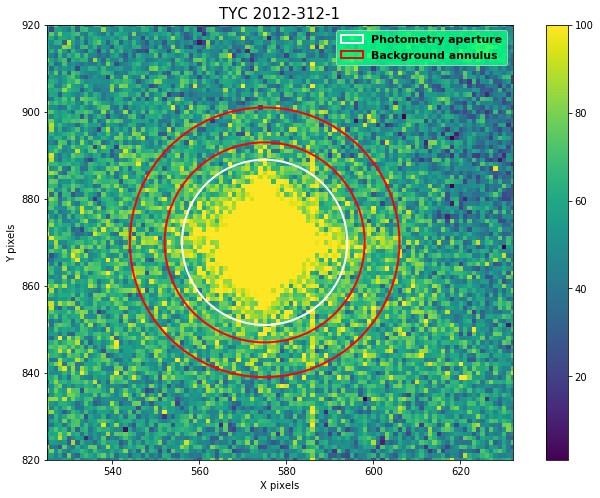

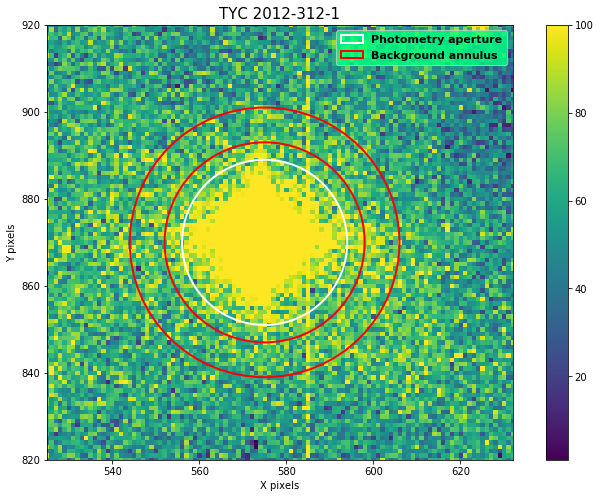

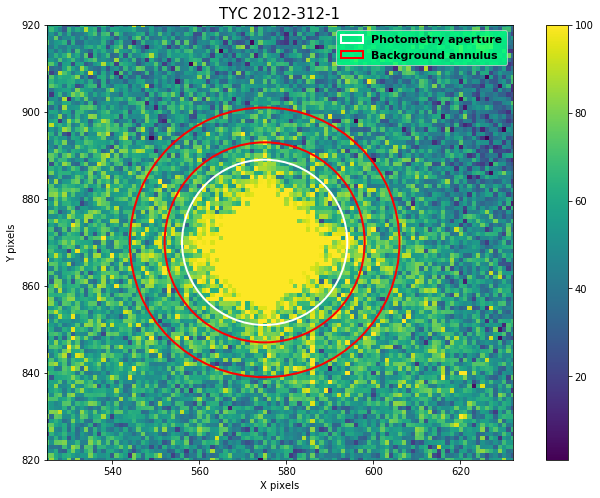

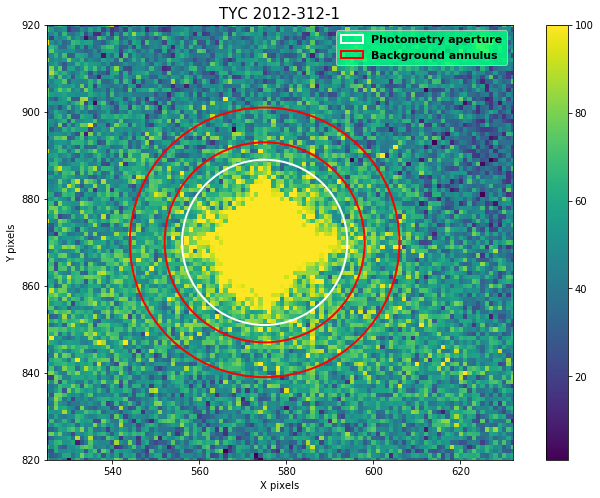

In [524]:
starCounts = photometry(starlist,starApers,starAnns)

In [728]:
SNcounts, starCounts

(([859.3928956587619, 461802.04346311034, 29143.181232599316],
  [54.37769172070855, 229.34009177284366, 109.48493923646613]),
 ([168246.07233203406, 633063.5496054692],
  [88.61357499778023, 260.46260122174857]))

## dch Calculations 

In [729]:
starPos = (781,1495)
starPos2 = (779,1480)
starR = 13
rin = 15
rout = 21

starApr = CircularAperture(starPos, starR)
starAnn = CircularAnnulus(starPos, rin, rout)

starApr2 = CircularAperture(starPos2, starR)
starAnn2 = CircularAnnulus(starPos2, rin, rout)

Mean star counts: 15033.82785787312, Mean SN 2021euj counts: [54.37769172070855, 229.34009177284366, 109.48493923646613]


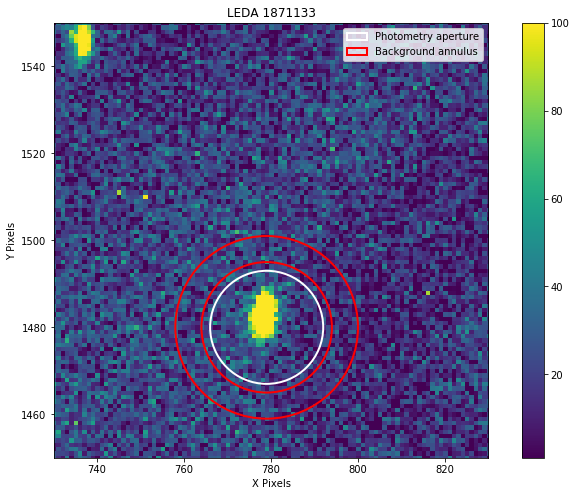

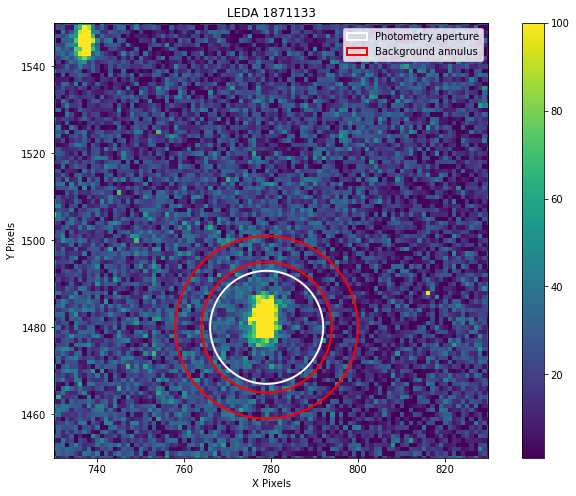

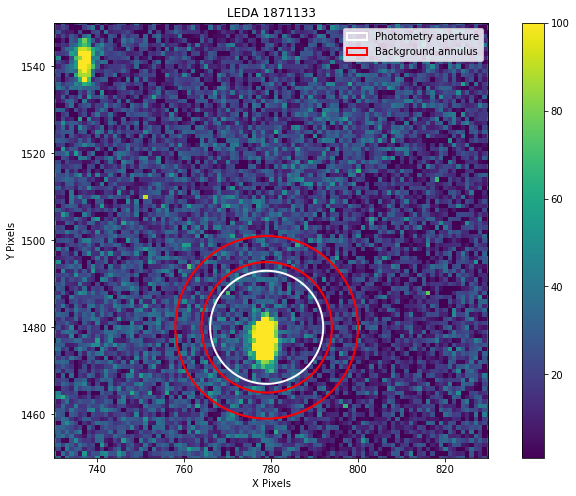

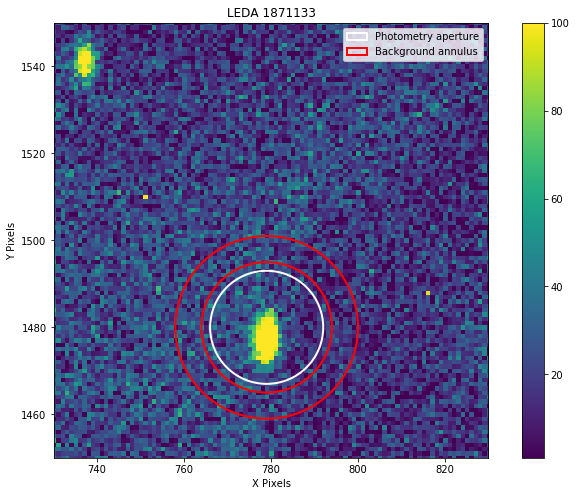

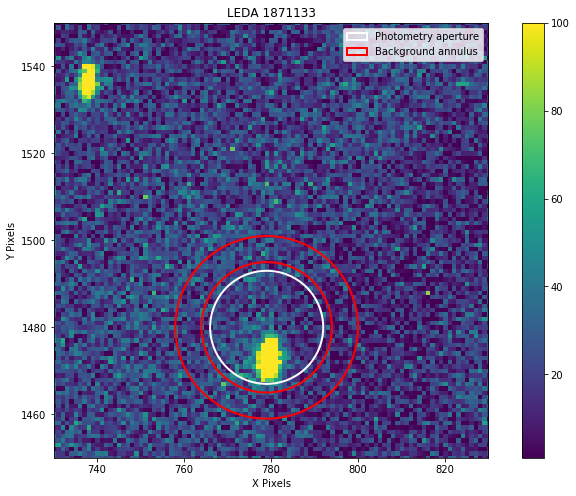

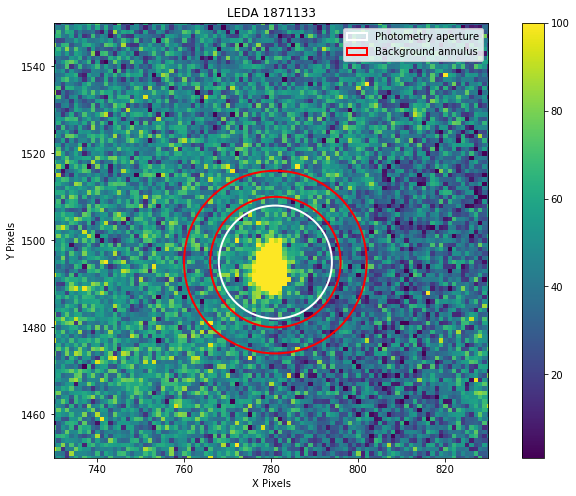

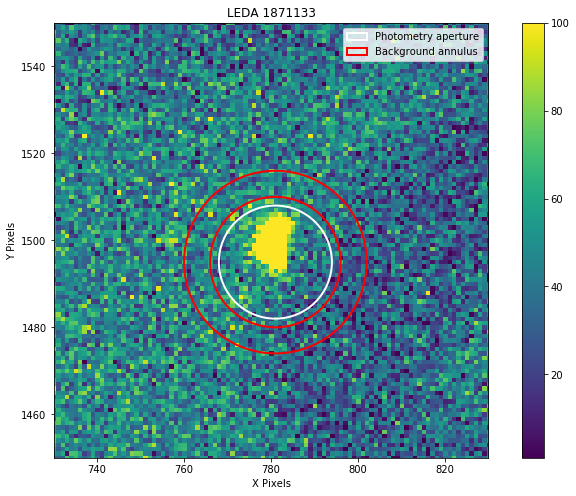

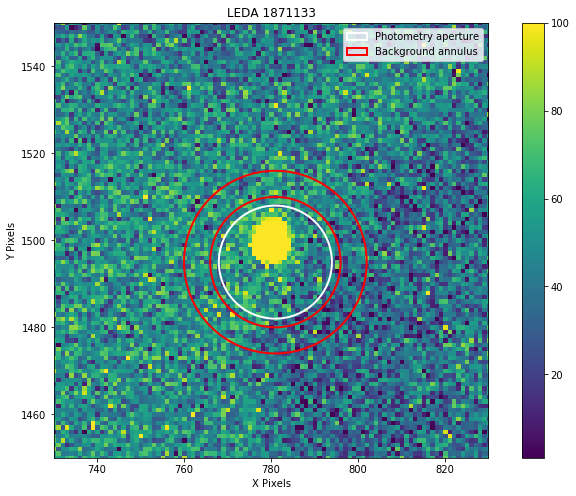

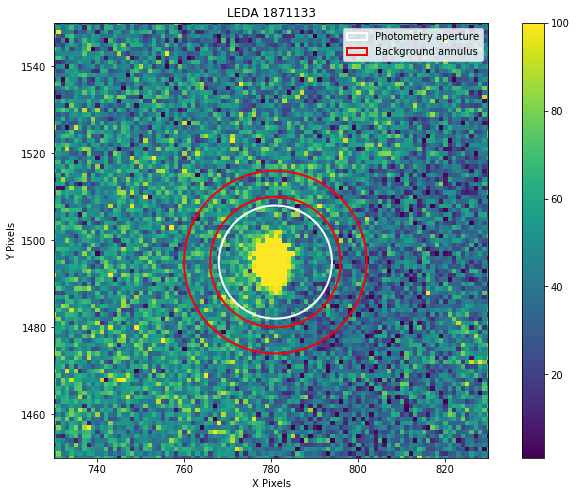

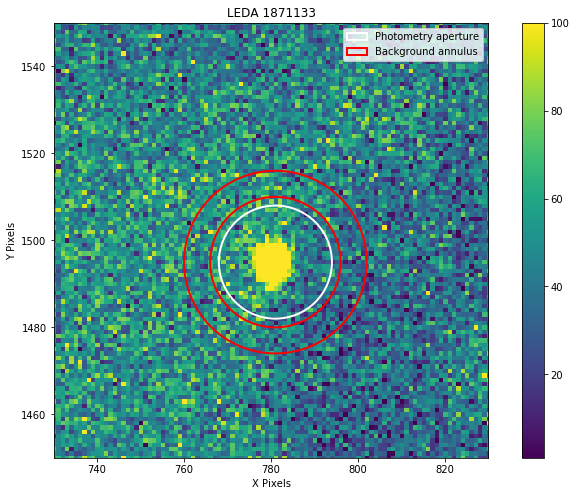

In [730]:
test = []  # just to check calculations of photometry function.
for i in range(len(euj1)):
    hdu = pyfits.open(dch1[i])
    data = hdu[0].data
    plt.figure(figsize=(12,8))
    plt.imshow(data,origin='lower',interpolation='nearest',vmin=1, vmax=100)
    plt.colorbar()
    if i <= 4:
        apers = [starApr2, starAnn2]
        ap_patches = starApr2.plot(color='white', lw=2,label='Photometry aperture')
        ann_patches = starAnn2.plot(color='red', lw=2,label='Background annulus')
    else:
        apers = [starApr, starAnn]
        ap_patches = starApr.plot(color='white', lw=2,label='Photometry aperture')
        ann_patches = starAnn.plot(color='red', lw=2,label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.xlim(730,830)
    plt.ylim(1450,1550)
    plt.xlabel("X Pixels")
    plt.ylabel("Y Pixels")
    plt.title("LEDA 1871133")
    plt.legend()
    if i == 9:
        plt.savefig("2021dchRef.png")
    phot_table = aperture_photometry(data, apers)

    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table) #The aperture_sum_0 column refers to the first aperture in the list of input apertures 
    #(i.e., the circular aperture) and the aperture_sum_1 column refers to the second aperture (i.e., the circular annulus).

        bkg_mean = phot_table['aperture_sum_1'] / starAnn.area
        bkg_sum = bkg_mean * starApr.area  # for the source, this is the total number of background counts in circle.
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['residual_aperture_sum'] = final_sum  # after deleting background
        phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
        #print(phot_table['residual_aperture_sum']) # number of photons at the filter wavelength. Energy -> Flux. 
        #print("-x-x-x-x-x--x-x-x-x--x-x--x-xx-x-x-x-x-x--x-x-x-x--x-x--x-xx-x-x-x-x-x--x-x-x-x--x-x--x-xx")
        test.append(final_sum)
dchCounts = np.mean(test)
print("Mean star counts: {}, Mean SN 2021euj counts: {}".format(dchCounts,SNcounts[1]))

In [789]:
print("SN counts: ",SNcounts) 
allstarCounts = [(starCounts[0][0], dchCounts, starCounts[0][1]),(starCounts[1][0],56.445123563227, starCounts[1][1])]
print("\nStar counts: ",allstarCounts)

SN counts:  ([859.3928956587619, 461802.04346311034, 29143.181232599316], [54.37769172070855, 229.34009177284366, 109.48493923646613])

Star counts:  [(168246.07233203406, 15033.82785787312, 633063.5496054692), (88.61357499778023, 56.445123563227, 260.46260122174857)]


In [790]:
SNcountUnc = np.array(SNcounts[1])/np.array((SNcounts[0]))  # uncertainties in log: dx/x 
starcountUnc = np.array(allstarCounts[1])/np.array(allstarCounts[0])

In [791]:
C = 25
starMags = [13.6052,16.1896163709707,12.0909]  # in g band from simbad.
starMagsUnc = np.array([0.0003, 0.00031, 0.0002])
m_inst = C - 2.5*np.log10(allstarCounts[0])  # C chosen such that the instrumental magnitude is ~15
m_instStarUnc = 2.5*(starcountUnc)

In [792]:
m_inst, m_instStarUnc

(array([11.93513766, 14.55732607, 10.49638173]),
 array([0.00131673, 0.00938635, 0.00102858]))

In [793]:
crxn = starMags - m_inst  # mV - mInst = correction
crxnUnc = np.sqrt(starMagsUnc**2+m_instStarUnc**2)
crxn, crxnUnc

(array([1.67006234, 1.6322903 , 1.59451827]),
 array([0.00135047, 0.00939147, 0.00104784]))

In [794]:
m_instSN = C - 2.5*np.log10(SNcounts[0])
SNmags = crxn + m_instSN
m_instSNUnc = 2.5*(SNcountUnc)
SNmagsUnc = np.sqrt(crxnUnc**2+m_instSNUnc**2)

In [795]:
m_instSN, m_instSNUnc

(array([17.6645206 , 10.83886037, 13.83865761]),
 array([0.15818635, 0.00124155, 0.00939199]))

In [796]:
SNmags, SNmagsUnc

(array([19.33458294, 12.47115068, 15.43317588]),
 array([0.15819212, 0.00947318, 0.00945026]))

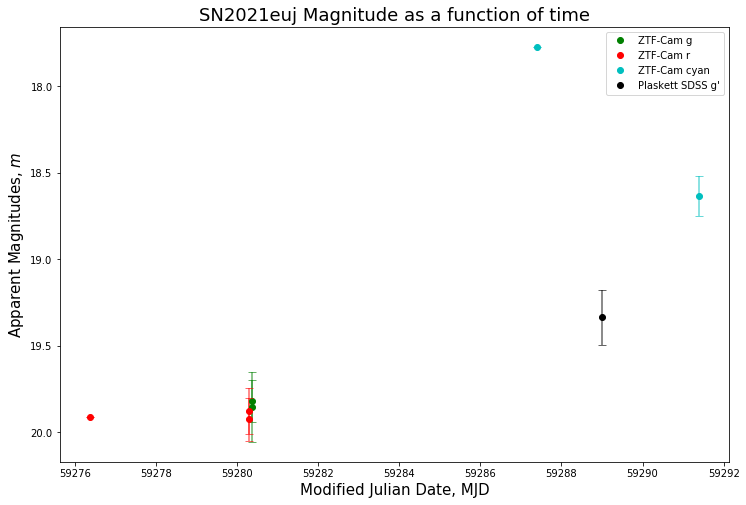

In [833]:
# SN2021euj,59276.3689352,19.9105,,T,r,ZTF-Cam,P48,Transient Name Server
# SN2021euj,59280.2845486,19.9255,0.124428,F,r,ZTF-Cam,P48,Transient Name Server
# SN2021euj,59280.2860185,19.8785,0.133326,F,r,ZTF-Cam,P48,Transient Name Server
# SN2021euj,59280.3593634,19.8195,0.121236,F,g,ZTF-Cam,P48,Transient Name Server
# SN2021euj,59280.3603009,19.8537,0.202569,F,g,ZTF-Cam,P48,Transient Name Server
# SN2021euj,59287.385,17.77,,T,cyan,ACAM1,ATLAS1,Transient Name Server
# SN2021euj,59291.386,18.634,0.116,F,cyan,ACAM1,ATLAS1,Transient Name Server

eujG = [19.8195,19.8537] # upper limits respectively: 0.121236, 0.202569
eujGdates = [59280.359363,59280.3603009]

eujR = [19.9105,19.925,19.8785] # NA, 0.124428, 0.133326
eujRdates = [59276.3689352,59280.2845486,59280.2860185]

eujC = [17.77,18.634] # NA, 0.116
eujCdates = [59287.385,59291.386]

eujPlas, eujPlasDate = SNmags[0], 59289

plt.figure(figsize=(12,8))
plt.plot(eujGdates,eujG,"go",label="ZTF-Cam g")
plt.errorbar(eujGdates,eujG, yerr=[0.121236, 0.202569],fmt=' ',capsize=4, color='g', alpha=0.6)
plt.plot(eujRdates,eujR,"ro",label="ZTF-Cam r")
plt.errorbar(eujRdates,eujR, yerr=[0,0.124428, 0.133326],fmt=' ',capsize=4,color='r', alpha=0.6)
plt.plot(eujCdates,eujC,"co",label="ZTF-Cam cyan")
plt.errorbar(eujCdates,eujC,yerr=[0, 0.116],fmt=' ',capsize=4,color='c', alpha=0.6)
plt.plot(eujPlasDate,eujPlas,"ko",label="Plaskett SDSS g'")  # calculate error bars for this calculation
plt.errorbar(eujPlasDate,eujPlas,yerr=SNmagsUnc[0],fmt=' ',capsize=4,color='k', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel("Modified Julian Date, MJD",fontsize=15)
plt.ylabel("Apparent Magnitudes, $m$",fontsize=15)
plt.title("SN2021euj Magnitude as a function of time",fontsize=18)
plt.legend()
plt.savefig("eujPhotometry.png")

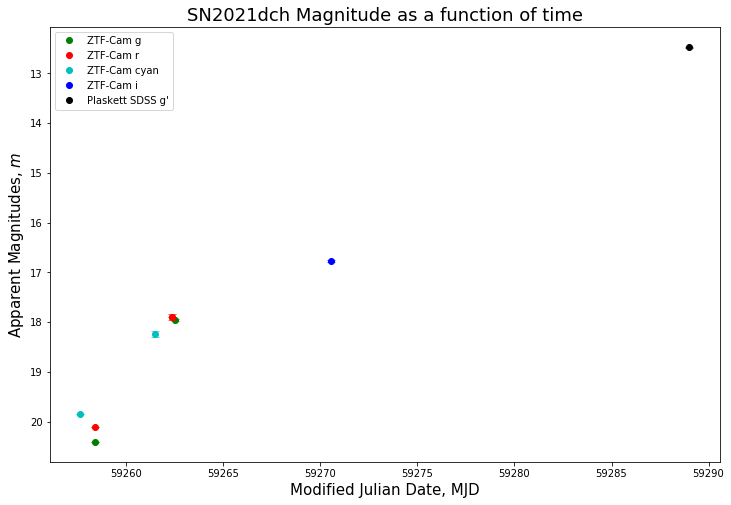

In [802]:
# event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
# SN2021dch,59257.625,19.85,,T,cyan,ACAM1,ATLAS1,Transient Name Server
# SN2021dch,59258.3539468,20.1172,,T,r,ZTF-Cam,P48,Transient Name Server
# SN2021dch,59258.381,20.41,,T,g,ZTF-Cam,P48,Transient Name Server
# SN2021dch,59261.492,18.244,0.062,F,cyan,ACAM1,ATLAS1,Transient Name Server
# SN2021dch,59262.371,17.9,,F,r,ZTF-Cam,P48,Transient Name Server
# SN2021dch,59262.3714352,17.8975,0.056772,F,r,ZTF-Cam,P48,Transient Name Server
# SN2021dch,59262.519,17.95,,F,g,ZTF-Cam,P48,Transient Name Server
# SN2021dch,59270.537,16.77,0.02,F,i,GPC1,PS1,Transient Name Server
# SN2021dch,59275.5,16.3,,F,,,,"Transient Name Server,Latest Supernovae"

dchG = [20.41,17.95] # upper limits respectively: 0.121236, 0.202569
dchGdates = [59258.381,59262.519]
dchGDates = ["02-13-2021", "02-17-2021"] 

dchR = [20.1172,17.9,17.8975] # NA, 0.124428, 0.133326
dchRdates = [59258.3539468,59262.371,59262.3714352]
dchRDates = ["02-13-2021", "02-17-2021", "02-17-2021"]

dchC = [19.85,18.244] # NA, 0.116
dchCdates = [59257.625,59261.492]
dchCDates = ["02-12-2021","02-16-2021"]

dchI = [16.77] # NA, 0.116
dchIdates = [59270.537]
dchIDates = ["02-25-2021"]

dchPlas, dchPlasDate = SNmags[1], 59289

plt.figure(figsize=(12,8))
plt.plot(dchGdates,dchG,"go",label="ZTF-Cam g")
plt.errorbar(dchGdates,dchG, yerr=[0,0.02],fmt=' ',capsize=4, color='g', alpha=0.6)
plt.plot(dchRdates,dchR,"ro",label="ZTF-Cam r")
plt.errorbar(dchRdates,dchR, yerr=[0,0,0.056772],fmt=' ',capsize=4,color='r', alpha=0.6)
plt.plot(dchCdates,dchC,"co",label="ZTF-Cam cyan")
plt.errorbar(dchCdates,dchC,yerr=[0, 0.062],fmt=' ',capsize=4,color='c', alpha=0.6)
plt.plot(dchIdates,dchI,"bo",label="ZTF-Cam i")
plt.errorbar(dchIdates,dchI,yerr=[0.02],fmt=' ',capsize=4,color='b', alpha=0.6)
plt.plot(dchPlasDate,dchPlas,"ko",label="Plaskett SDSS g'")  # calculate error bars for this calculation
plt.errorbar(dchPlasDate,dchPlas,yerr=SNmagsUnc[1],fmt=' ',capsize=4,color='k', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel("Modified Julian Date, MJD",fontsize=15)
plt.ylabel("Apparent Magnitudes, $m$",fontsize=15)
plt.title("SN2021dch Magnitude as a function of time",fontsize=18)
plt.legend()
plt.savefig("dchPhotometry.png")

# ax2.xaxis.set_ticks_position("bottom")
# ax2.xaxis.set_label_position("bottom")
# ax2.spines["bottom"].set_position(("axes", -0.15))
# ax2.set_frame_on(True)
# ax2.patch.set_visible(False)
# ax2.spines["bottom"].set_visible(True)

# allticks = [59257.625,59258.3539468,59258.381,59261.492,59262.371,59262.3714352,59262.519,59270.537]
# dates = ["02-12-2021","02-13-2021","02-13-2021","02-16-2021","02-17-2021","02-17-2021","02-17-2021","02-25-2021"]
# x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]
# ax2.set_xticks(allticks,dateticks)

# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

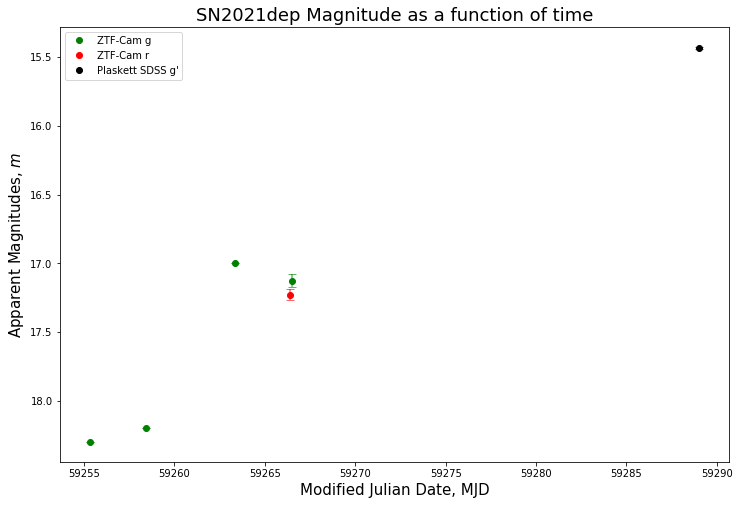

In [803]:
# event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
# SN2021dep,59255.33,18.3,,T,g,Cassius,ASASSN-2,Transient Name Server
# SN2021dep,59258.43,18.2,,F,g,Brutus,ASASSN-1,Transient Name Server
# SN2021dep,59263.37,17,,F,g,Paczynski,ASASSN-3,Transient Name Server
# SN2021dep,59266.3841898,17.2268,0.0378876,F,r,ZTF-Cam,P48,Transient Name Server
# SN2021dep,59266.4849769,17.1277,0.0468232,F,g,ZTF-Cam,P48,Transient Name Server

depG = [18.3,18.2,17,17.1277] # upper limits respectively: 0.121236, 0.202569
depGdates = [59255.33,59258.43,59263.37,59266.4849769]

depR = [17.2268] # NA, 0.124428, 0.133326
depRdates = [59266.3841898]

depPlas, depPlasDate = SNmags[2], 59289

plt.figure(figsize=(12,8))
plt.plot(depGdates,depG,"go",label="ZTF-Cam g")
plt.errorbar(depGdates,depG, yerr=[0,0,0,0.0468232],fmt=' ',capsize=4, color='g', alpha=0.6)
plt.plot(depRdates,depR,"ro",label="ZTF-Cam r")
plt.errorbar(depRdates,depR, yerr=[0.0378876],fmt=' ',capsize=4,color='r', alpha=0.6)
plt.plot(depPlasDate,depPlas,"ko",label="Plaskett SDSS g'")  # calculate error bars for this calculation
plt.errorbar(depPlasDate,depPlas,yerr=SNmagsUnc[2],fmt=' ',capsize=4,color='k', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel("Modified Julian Date, MJD",fontsize=15)
plt.ylabel("Apparent Magnitudes, $m$",fontsize=15)
plt.title("SN2021dep Magnitude as a function of time",fontsize=18)
plt.legend()
plt.savefig("depPhotometry.png")

In [770]:
SNlist = [euj1,dch1,dep1]
SNpos = [(463,1097),(302,98),(500,1068)]
SNradii = [5,12,13]
SNrin = [6,13,14]
SNrout = [9,18,19]

SNapers = []
SNann = []
for i in range(len(SNradii)):
    SNaps = CircularAperture(SNpos[i], SNradii[i])
    SNanns = CircularAnnulus(SNpos[i], r_in=SNrin[i], r_out=SNrout[i])
    SNapers.append(SNaps), SNann.append(SNanns)

    
sPos = [(435,1206),(781,1495),(575,870)]
sR = [13,13,19]
srin = [15,15,23]
srout = [21,21,31]

sApers = []
sAnn = []
for i in range(len(sR)):
    sAps = CircularAperture(sPos[i], sR[i])
    sAnns = CircularAnnulus(sPos[i], srin[i], srout[i])
    sApers.append(sAps), sAnn.append(sAnns)

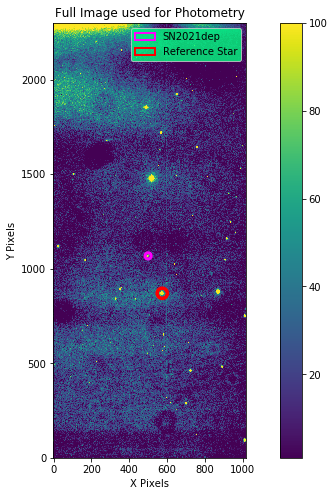

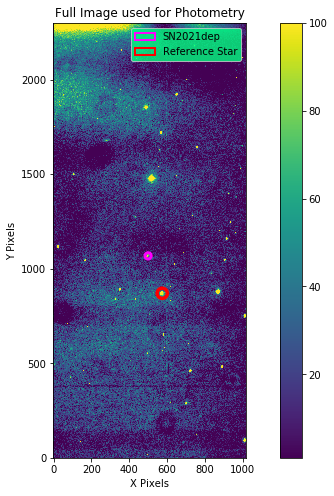

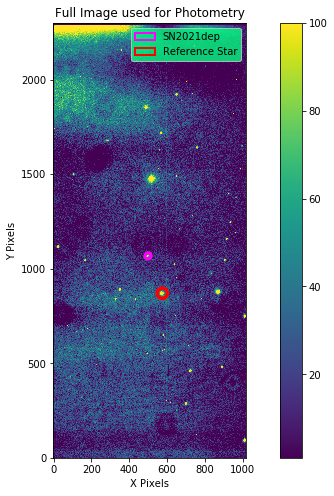

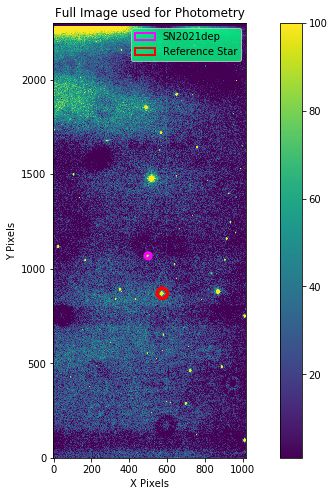

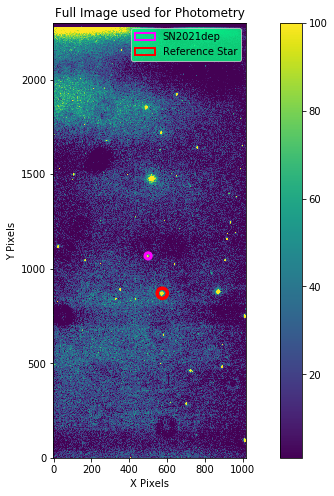

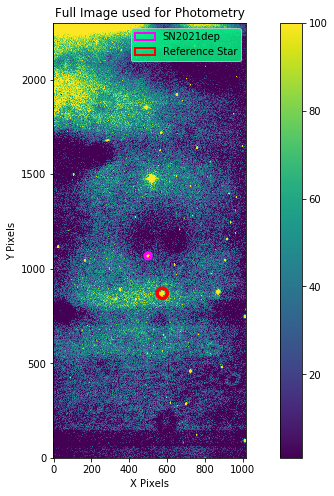

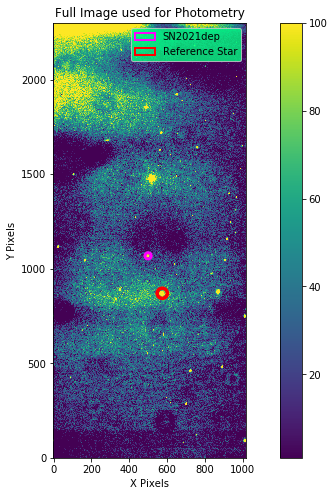

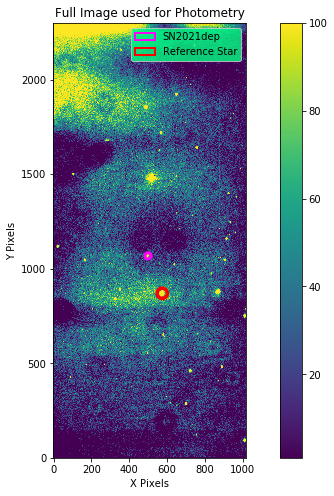

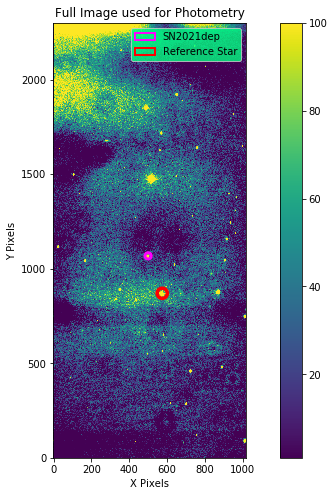

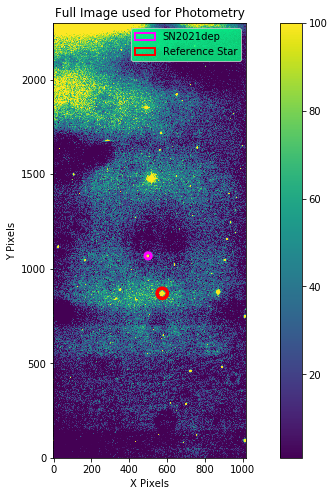

In [748]:
for k in range(len(euj1)):
    hdu = pyfits.open(dep1[k])
    data = hdu[0].data
    plt.figure(figsize=(12,8))
    plt.imshow(data,origin='lower',interpolation='nearest',vmin=1, vmax=100)
    plt.colorbar()

    ann_patches = SNann[2].plot(color='magenta', lw=2,label='SN2021dep')
    handles = (ann_patches[0])

    ann_patches2 = sAnn[2].plot(color='red', lw=2,label='Reference Star')
    handles2 = (ann_patches2[0])
    
    plt.title("Full Image used for Photometry")
    plt.xlabel("X Pixels")
    plt.ylabel("Y Pixels")
    plt.ylim((0,2300))
    plt.legend()
    plt.legend(loc='best',facecolor='springgreen')
    #if k == 2:
    #    plt.savefig("depFullImage.png")

## Flux Calculations

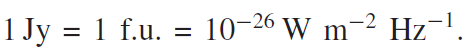

Sutton Table 2.2 SDSS Bands

$m_g = -2.5log_{10}\left(\frac{F_{\lambda}}{F_{\lambda_0}}\right) = -2.5log_{10}\left(\frac{F_{\nu}}{F_{\nu_0}}\right)$

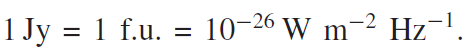
Measure the slope of the cz versus dL relation when z ≪ 1; this gives H0.

In [824]:
Fv0 = 3631
Fv = Fv0*10**(-1*SNmags/2.5)
Fv*1000 #mJy

array([ 0.06701825, 37.28773279,  2.43644099])

In [825]:
c = 3E5
z = np.array([0.003803, 0.02, 0.036805])
dL = np.array([16.88, 90, 167.43])#*(3.086E22) #Mpc
cz = c*z

result = linregress(dL, cz)
model = result[0]*np.asarray(dL)+result[1]

In [829]:
result

LinregressResult(slope=65.75646681819399, intercept=48.2478623670695, rvalue=0.9999826487435959, pvalue=0.003750258573093643, stderr=0.3873687509611972)

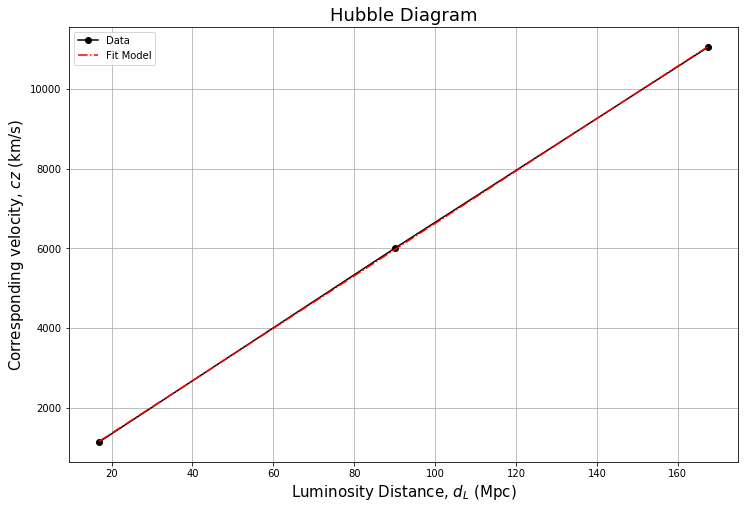

In [823]:
plt.figure(figsize=(12,8))
plt.plot(dL, cz, "ko-", label="Data")
plt.plot(dL, model,'r-.',label="Fit Model")
plt.xlabel("Luminosity Distance, $d_L$ (Mpc)",fontsize=15)
plt.ylabel("Corresponding velocity, $cz$ (km/s)",fontsize=15)
plt.title("Hubble Diagram",fontsize=18)
plt.legend()
plt.grid()
plt.savefig("HubbleConstant.png")

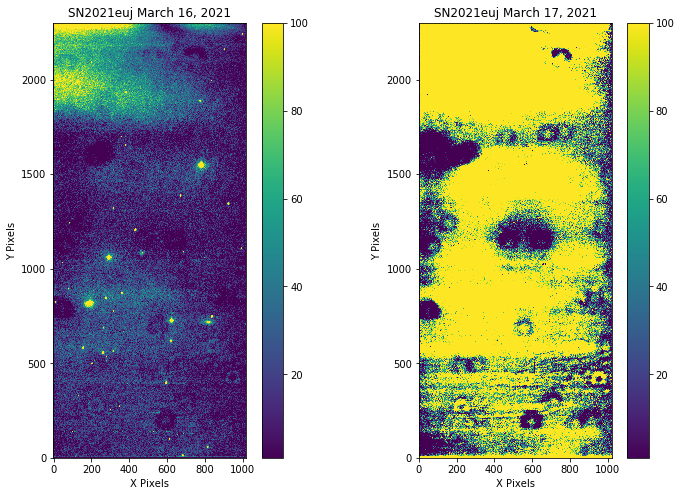

In [725]:
plt.figure(figsize=(12,8))
plt.subplot(121)
hdu = pyfits.open(euj1[2])
data = hdu[0].data
plt.imshow(data,origin='lower',interpolation='nearest',vmin=1, vmax=100)
plt.colorbar()
plt.title("SN2021euj March 16, 2021")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.ylim((0,2300))

plt.subplot(122)
hdu2 = pyfits.open(r"C:\Users\robin\Downloads\finalShifted2\final2-003866.fits")
data2 = hdu2[0].data
plt.imshow(data2,origin='lower',interpolation='nearest',vmin=1, vmax=100)
plt.colorbar()
plt.title("SN2021euj March 17, 2021")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.ylim((0,2300))
#plt.savefig("day1day2.png")